# Introduction to FredBrain via a Labor Market Analysis 🧑‍💼
The **Labor Market** is a central topic in today’s economic discussions, consistently surpassing expectations and fueling debates about its implications for both domestic and global economies. Amidst global market instabilities and ongoing disruptions in supply chains, compounded by geopolitical tensions, the performance of the U.S. Labor Market remains robust and resilient. This strength stands in stark contrast to the recessionary trends and stagnation seen in various other regions worldwide.

## Unveiling the Hidden Realities 📖
What implications does this hold? If the American economy continues to display records labor market figures whilst the S&P 500 surpasses the 5,000-point milestone, one might wonder if Americans are experiencing **unprecedented prosperity** or, have other other economic indicators, such as rising living costs, **negated the benefits** of this growth for the average American.😓

## Data is key 🔐
To answer such questions data is essential. Which is why **FredBrain** was designed to simplify the integration of economic data into various projects, whether for personal use, organizational data management, or academic research. With added MySQLBrain and GPT integration, it facilitates a smoother workflow for analyzing and leveraging economic insights. Further documentation and installation instructions can be found on PyPi.org - [FredBrain](https://pypi.org/project/FredBrain)

## The analysis - A fog of Growth? 👩‍💻
To uncover answers to our questions we will be analyzing numerous indicators from the **FRED API** via the **FredBrain** package which will give us insights into both the Labor Market as well as the prosperity of American Citizens. The analysis will comprise of visualizations, statistical analysis as well as modeling and also include feeding **ChatGPT 4.0**🤖 the data to explore how modern AI solutions can support us in analyzing and processing key economic indicators.

### Analysis Outline:
- Chapter 1. Data Visualization and Exploration
- Chapter 2. Statistical Analysis and Modeling
- Chapter 3. Letting GPT Analyze the Dataset, Visualizations and Models Independently and Contribute a Response

The code used can be found within the following Notebook Link -

### Author
**Alexander Richt**

*Strategic Data and Investment Analyst*

*I am dedicated to continuous professional development and thrive in roles that merge technical expertise with strategic oversight. I am committed to leveraging innovation in programming, modeling, and analytics to drive tangible results in the corporate, investment and finance sectors.*

**Credentials:** CFA Charterholder & MSc. in Economics with a focus in Econometrics

[alexander.richt1@gmail.com](mailto:alexander.richt1@gmail.com)  
[LinkedIn Profile](https://www.linkedin.com/in/alexander-richt/)  
[GitHub](https://github.com/AlexanderRicht/FredBrain)


---

In [2]:
import os
import pandas as pd
from dotenv import load_dotenv
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from pandas.plotting import register_matplotlib_converters
from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool
from bokeh.io import output_notebook
from adjustText import adjust_text
import textwrap


load_dotenv()

# Now access the variables using os.getenv
DATABASE_HOST = os.getenv('DATABASE_HOST')
DATABASE_USERNAME = os.getenv('DATABASE_USERNAME')
DATABASE_PASSWORD = os.getenv('DATABASE_PASSWORD')
DATABASE_NAME = os.getenv('DATABASE_NAME')

In [3]:
try:
    print("Connecting to the database...")
    # Pass connection parameters as keyword arguments
    db_manager = mysql.connector.connect(host=DATABASE_HOST, user=DATABASE_USERNAME, passwd=DATABASE_PASSWORD, db=DATABASE_NAME)
    cursor = db_manager.cursor()
    cursor.execute("SHOW TABLES")  # This is the correct method to list all databases
except mysql.connector.Error as e:
    print("Error while connecting to MySQL", e)

Connecting to the database...


## Unemployment Rate
The unemployment rate is an important indicator as it gives us valuable insights into the proportion of unemployed individuals within the labor force. High unemployment levels suggest an economic downturn, characterized by a scarcity of available jobs or limited hiring activity among companies. Conversely, low unemployment rates typically indicate a robust job market, reflecting strong economic health and ample employment opportunities for job seekers. This metric is instrumental in assessing the overall performance of the job market.

### Historical Levels of Employment
As seen below, unemployment rates have been at a historical low stagnating at sub-4% levels after reaching historical highs during the COVID pandemic.

The only time periods were unemployment rates sustained at below 4% levels was in 2001 and from 2018 to 2019 before the COVID pandemic occured.

<sup id="a1">[1](#f1)</sup> Unemployed: Includes individuals who do not have a job but are available for work and have been actively looked for work within the prior four weeks as well as those who are waiting to be recalled to a job from which they have been laid off.

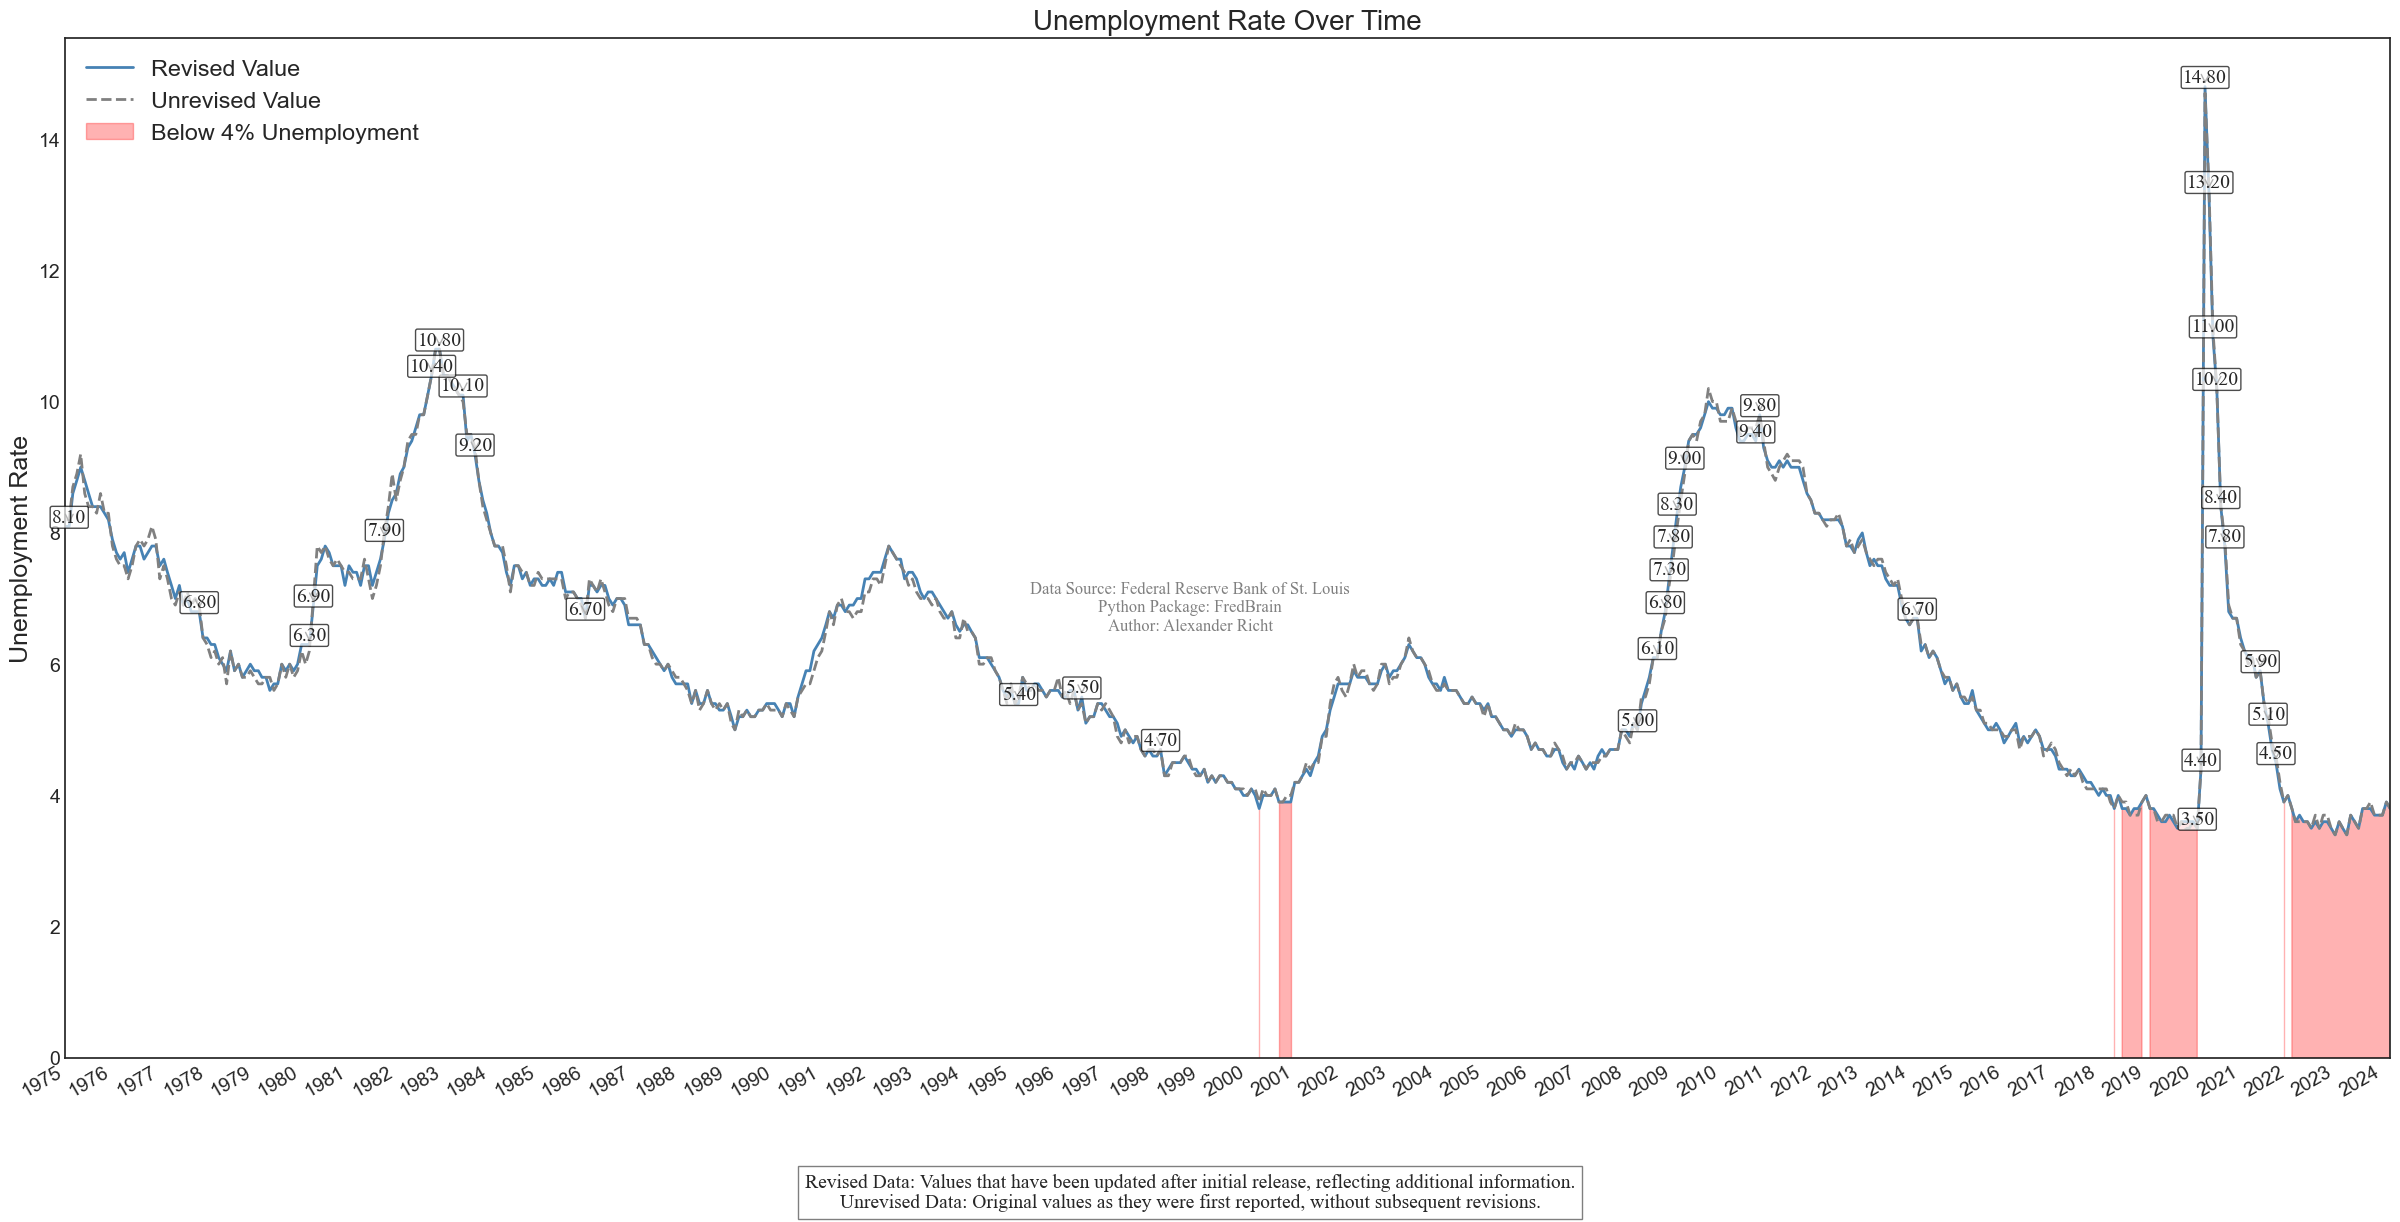

In [84]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series = 'UNRATE';"

cursor.execute(Data_Query)

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])


plt.plot(recent_df['Reporting Date'], recent_df['Revised Value'], color='steelblue', linewidth=2, label='Revised Value')
plt.plot(recent_df['Reporting Date'], recent_df['Unrevised Value'], color='gray', linewidth=2, linestyle='--', label='Unrevised Value')
# Create a shaded area for when the unemployment rate is below 4%
low_unemployment = recent_df['Revised Value'] < 4
plt.fill_between(recent_df['Reporting Date'], recent_df['Revised Value'], where=low_unemployment, color='red', alpha=0.3, label='Below 4% Unemployment')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions."
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
plt.legend(loc='upper left', fontsize='large', framealpha=0.9)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

def calculate_offset(value, fig, dpi, offset_factor=0.005):
    data_ratio = (fig.get_figheight() * dpi) / (fig.get_figwidth() * dpi)
    return value * offset_factor if data_ratio < 1 else value * offset_factor * data_ratio


recent_df['Value Change'] = recent_df['Revised Value'].diff()

threshold = recent_df['Value Change'].std() / 1.5

for i in range(1, len(recent_df)):
    if abs(recent_df.iloc[i]['Value Change']) > threshold:
        offset = calculate_offset(recent_df.iloc[i]['Revised Value'], plt.gcf(), plt.gcf().dpi)
        plt.annotate(
            f"{recent_df.iloc[i]['Revised Value']:.2f}",
            xy=(recent_df.iloc[i]['Reporting Date'], recent_df.iloc[i]['Revised Value']),
            xytext=(offset, offset),  # Offset from the point
            textcoords="offset points",
            ha='center',
            va='bottom',
            bbox=dict(boxstyle="round,pad=0.1", facecolor='white', edgecolor='black', alpha=0.7),
            arrowprops=dict(arrowstyle="->", color='black')  # Leader line
        )

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate() 
plt.figtext(0.5, 0.1, description, ha="center", fontsize=14, bbox={"facecolor":"white", "alpha":.5, "pad":5})
plt.text(0.5, 0.5, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=1, transform=plt.gcf().transFigure, zorder=0)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.ylabel("Unemployment Rate", fontsize=18)
plt.title("Unemployment Rate Over Time", fontsize=20)

plt.ylim(bottom=0)

plt.savefig('Unemployment Rate Over Time.png', format='png', dpi=150)

plt.show()

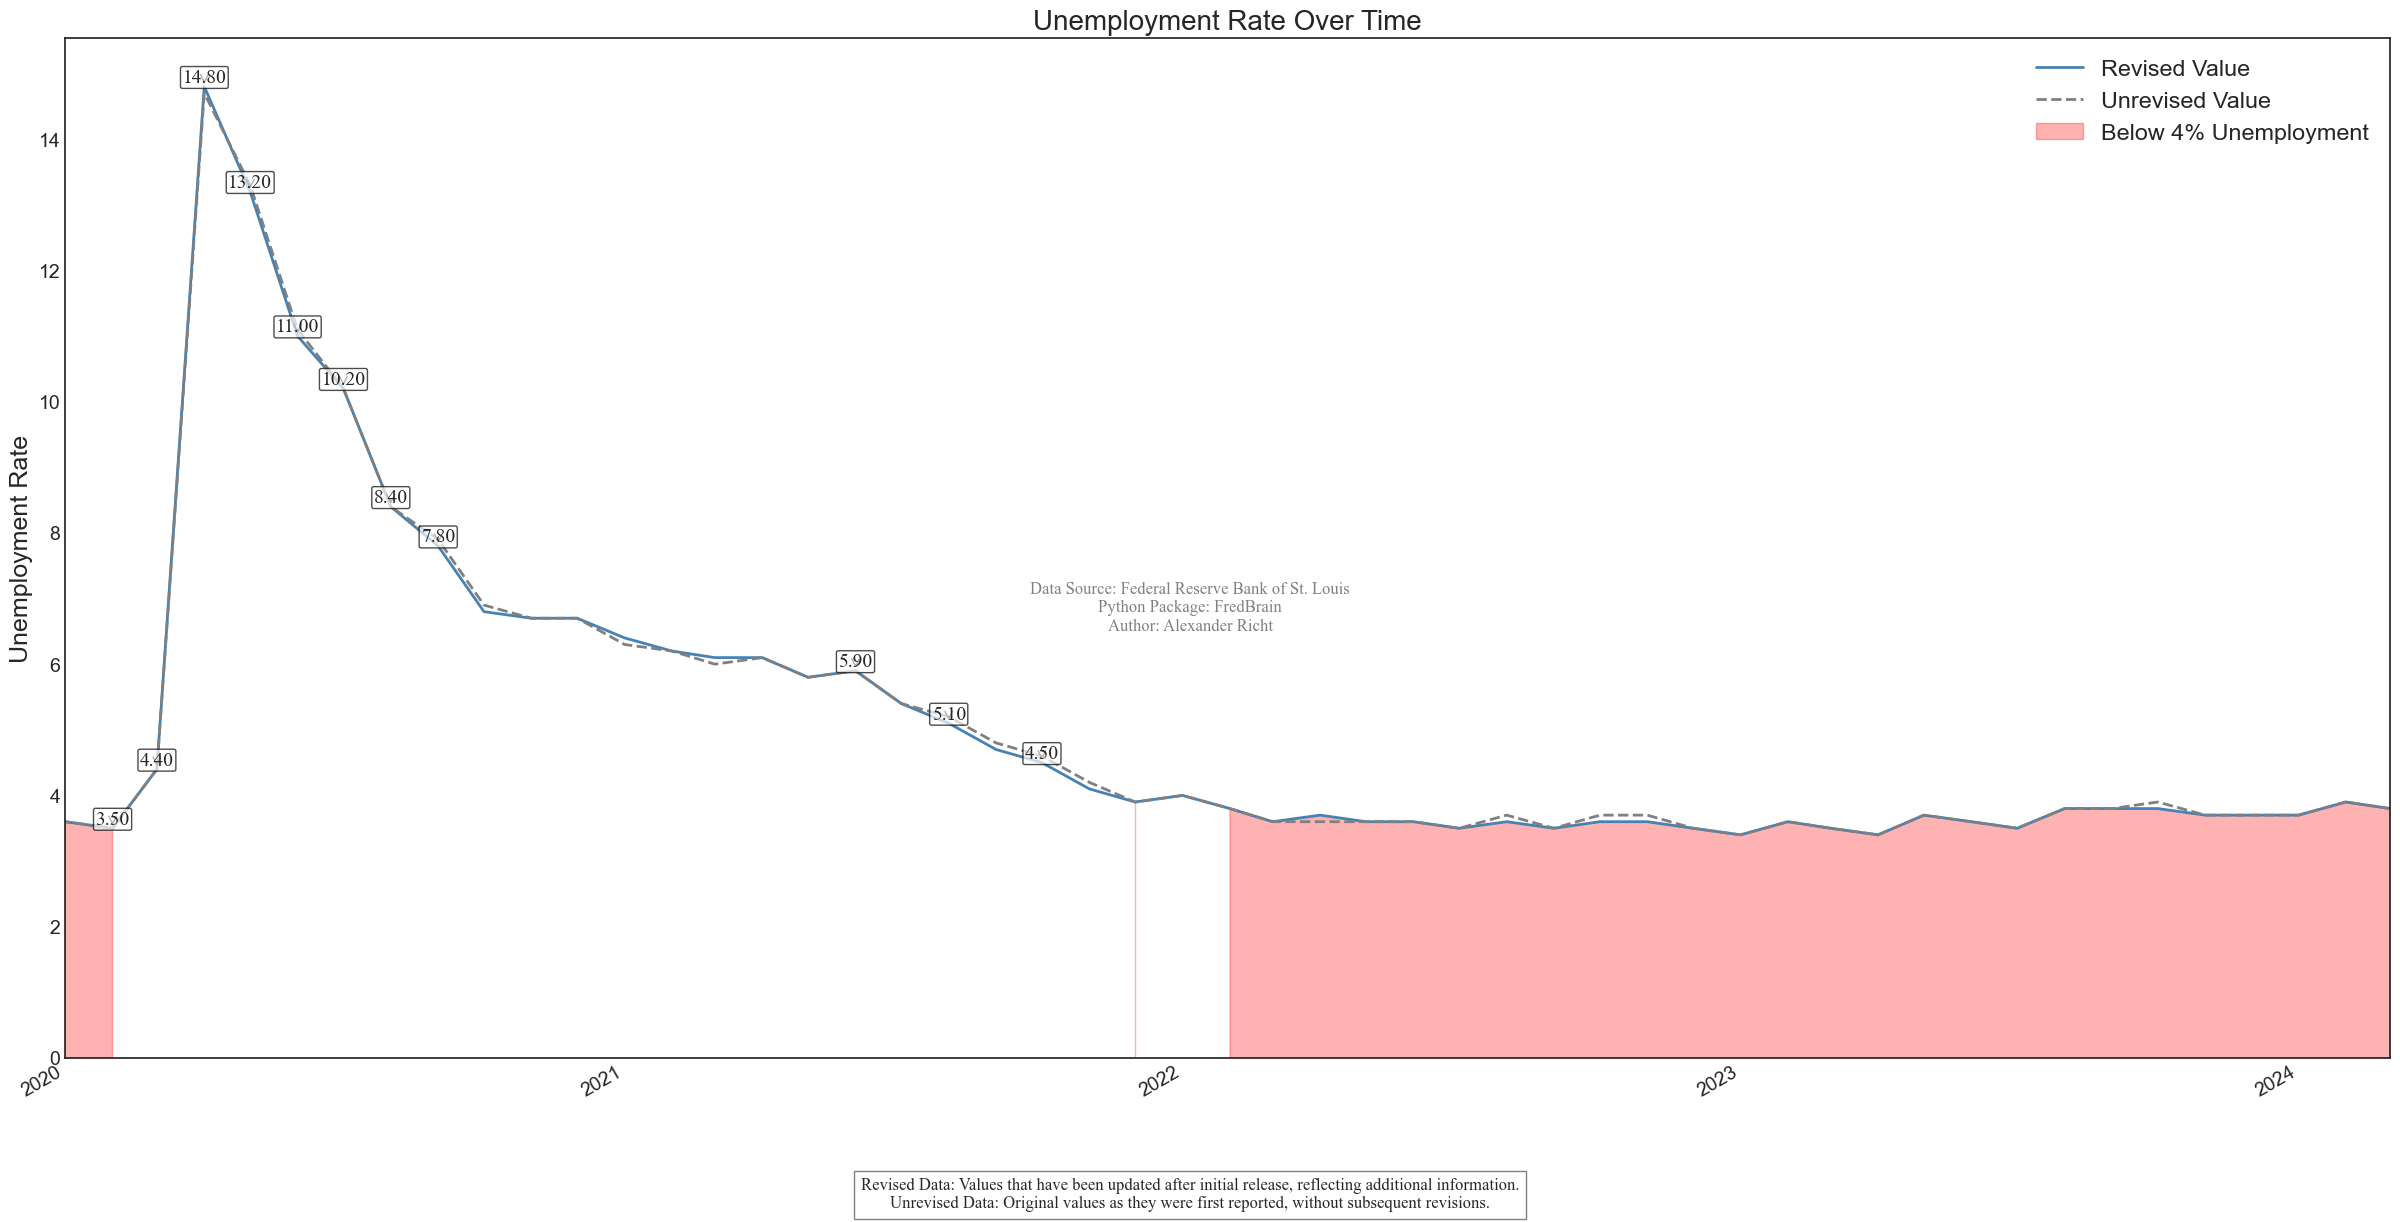

In [85]:
plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 5
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])


plt.plot(recent_df['Reporting Date'], recent_df['Revised Value'], color='steelblue', linewidth=2, label='Revised Value')
plt.plot(recent_df['Reporting Date'], recent_df['Unrevised Value'], color='gray', linewidth=2, linestyle='--', label='Unrevised Value')
# Create a shaded area for when the unemployment rate is below 4%
low_unemployment = recent_df['Revised Value'] < 4
plt.fill_between(recent_df['Reporting Date'], recent_df['Revised Value'], where=low_unemployment, color='red', alpha=0.3, label='Below 4% Unemployment')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions."
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
plt.legend(loc='upper right', fontsize='large', framealpha=0.9)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

def calculate_offset(value, fig, dpi, offset_factor=0.005):
    data_ratio = (fig.get_figheight() * dpi) / (fig.get_figwidth() * dpi)
    return value * offset_factor if data_ratio < 1 else value * offset_factor * data_ratio


recent_df['Value Change'] = recent_df['Revised Value'].diff()

threshold = recent_df['Value Change'].std() / 4

for i in range(1, len(recent_df)):
    if abs(recent_df.iloc[i]['Value Change']) > threshold:
        offset = calculate_offset(recent_df.iloc[i]['Revised Value'], plt.gcf(), plt.gcf().dpi)
        plt.annotate(
            f"{recent_df.iloc[i]['Revised Value']:.2f}",
            xy=(recent_df.iloc[i]['Reporting Date'], recent_df.iloc[i]['Revised Value']),
            xytext=(offset, offset),  # Offset from the point
            textcoords="offset points",
            ha='center',
            va='bottom',
            bbox=dict(boxstyle="round,pad=0.1", facecolor='white', edgecolor='black', alpha=0.7),
            arrowprops=dict(arrowstyle="->", color='black')  # Leader line
        )

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate() 
plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.5, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=1, transform=plt.gcf().transFigure, zorder=0)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.ylabel("Unemployment Rate", fontsize=18)
plt.title("Unemployment Rate Over Time", fontsize=20)

plt.ylim(bottom=0)

plt.savefig('Unemployment Over Time_5years.png', format='png', dpi=150)

plt.show()

## Labor Force Participation
Another key metric to the involvement of the work force in the economy is the participation rate. 

The participation rate will be the percentage of the population that is either working or actively looking for work and can be a reflection of the overall health of the economy or other isolated trends such as a shift in the age of the population or behavior of certain demographics in the population.

### Twilight of Tenure: The Departure of the Aging Workforce
The current data suggests that we are experiencing significant downward pressure, with the labor force participation rate at its lowest in the past half-century. This downturn is most likely a reflection of the aging demographic of the US population, contributing to sustained low unemployment rates below 4% as well as underlying systemic changes in the labor market. The retirement of a substantial segment within the workforce opens a gap, necessitating the filling of positions that become vacant.

### Changing Behaviors
Additionally, we can see how the participation of certain age groups has also impacted the aggregate long term development of the Labor Force Participation. Key takeways from below are:

* 16-19 Years:  With the increasing necessity of higher education by today's employers, we can see how dramatically the workforce participation of this age group has fallen as more younger individuals are attending a 2 or 4 year university before entering the workforce.
* 20-24 Years: A slight downward trend in this demographic may correspond to more individuals pursuing advanced degrees, such as Master's or Doctorates, than in the past.
* 25-54 Years: Despite common media and social media criticism towards younger generations, the labor force participation of the 'prime-age' demographic (25-54 years) has been consistently high, even showing a slight uptrend.
* 55 and Over: Either suprisingly or not suprisingly, this segment of labor force participation has increased at quite substantial levels. This may be a reflection of the fact that in today's economic & political climate, individuals have to work longer than ever before reaching the financial circumstances neccessary to achieve retirement between private and state savings.

The data underscores complex socioeconomic factors influencing labor market dynamics, including education trends and financial security.

<sup id="a1">[1](#f1)</sup> The labor force ecnompasses individuals 16 years of age and older who do not reside in insituitions (e.g., penal and mental facilities, homes for the aged) and are actively participating in the workforce by currently holding a job or by actively searching for one.

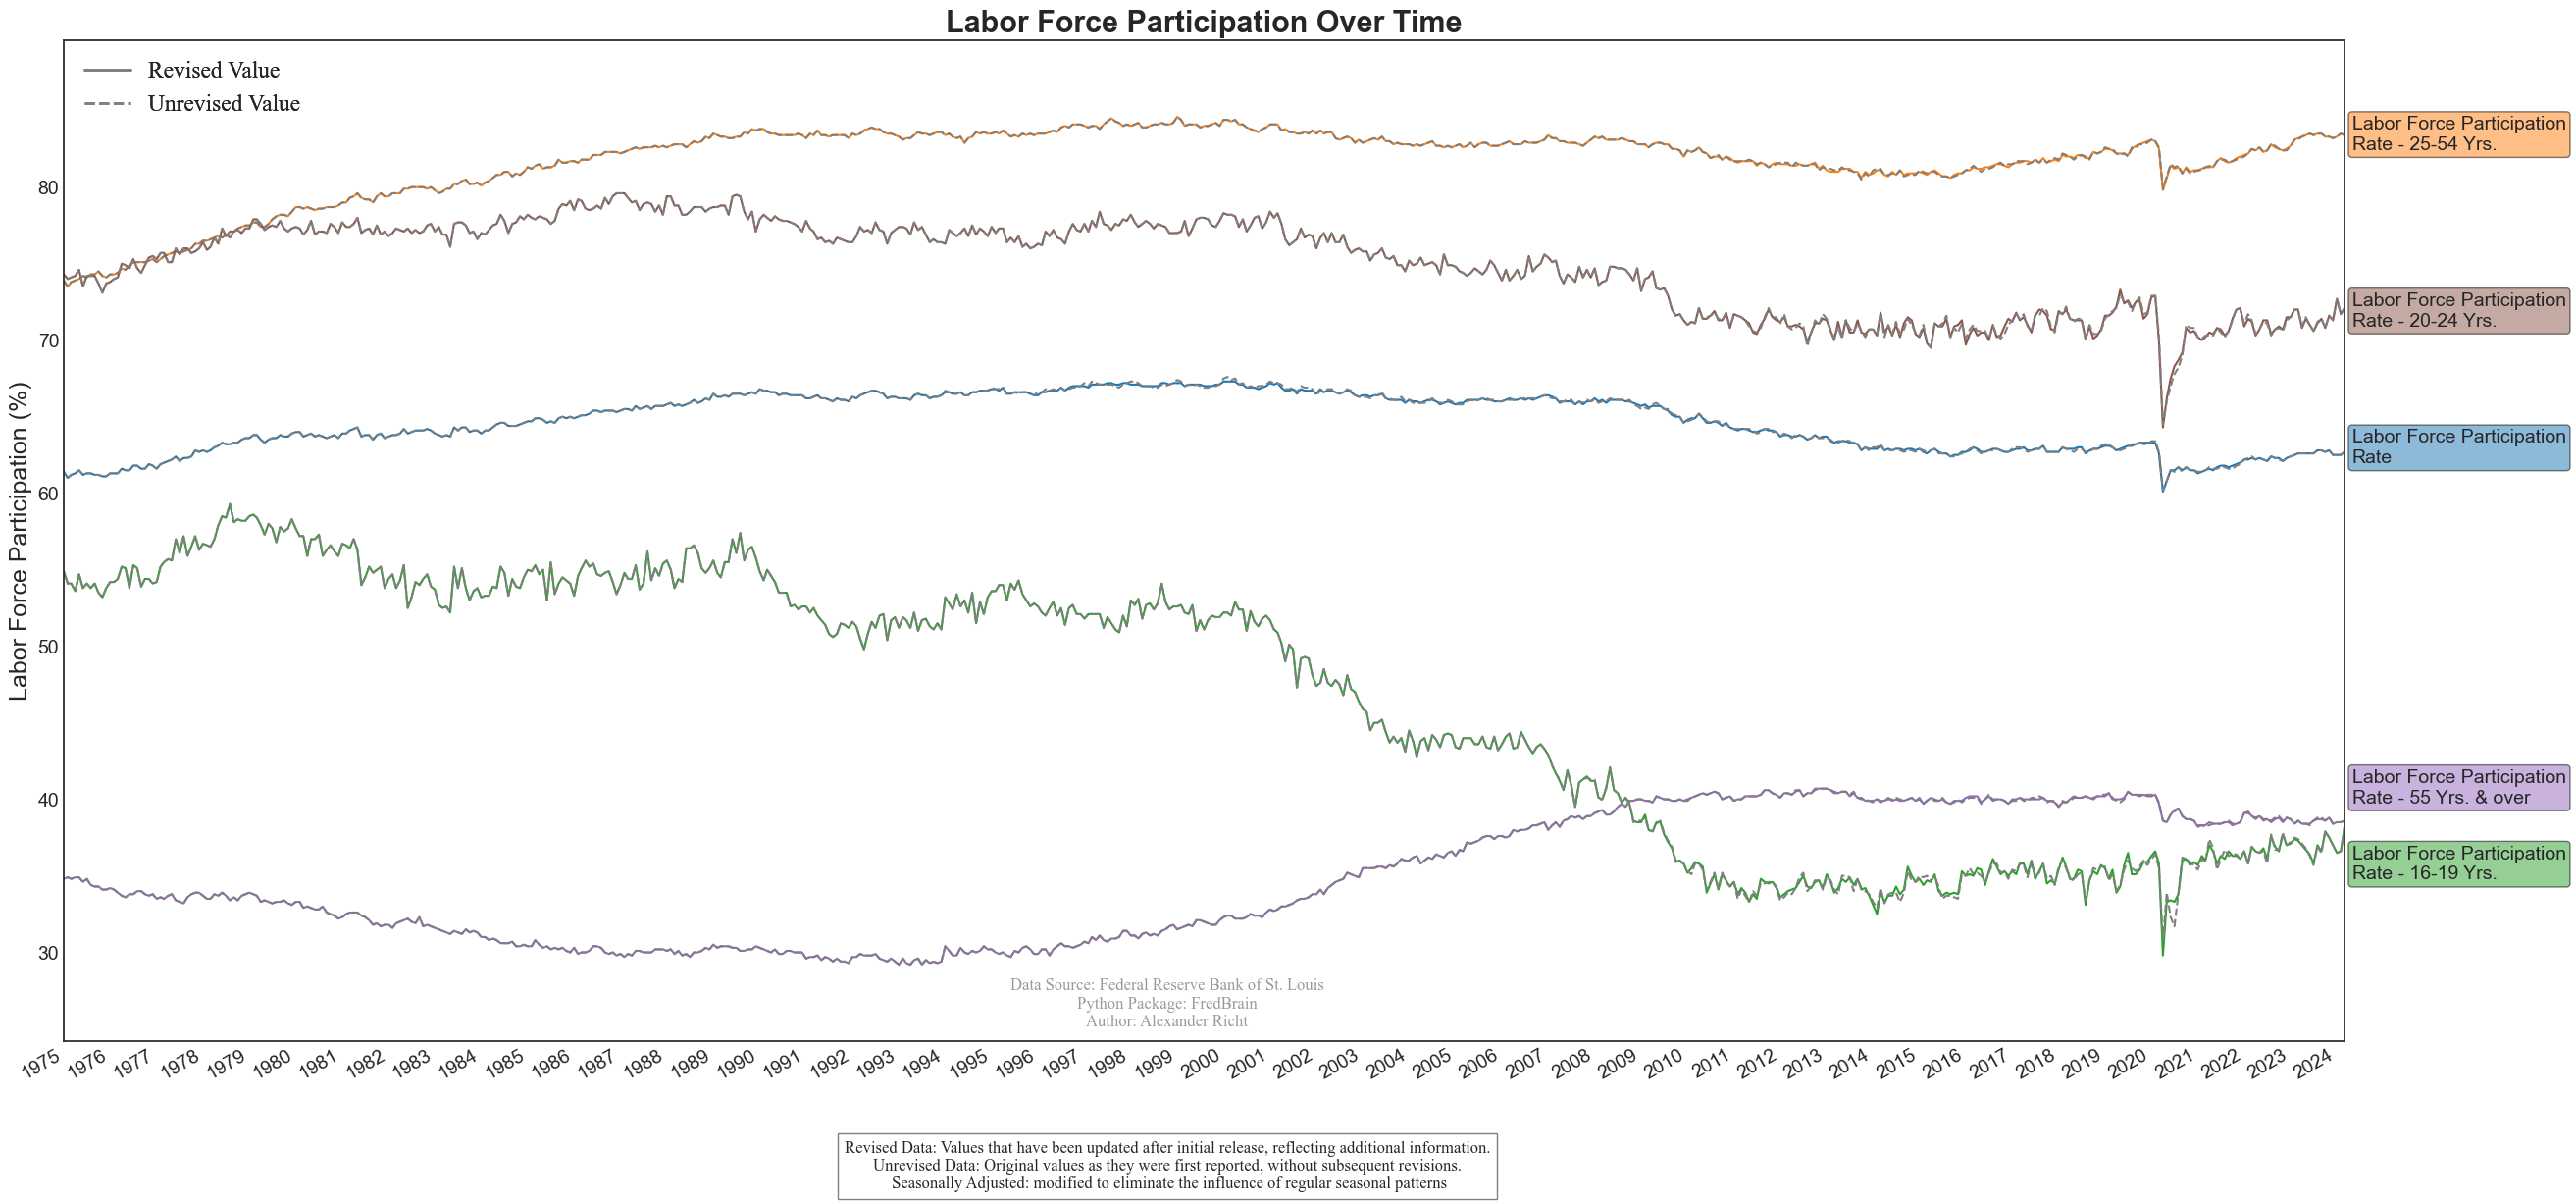

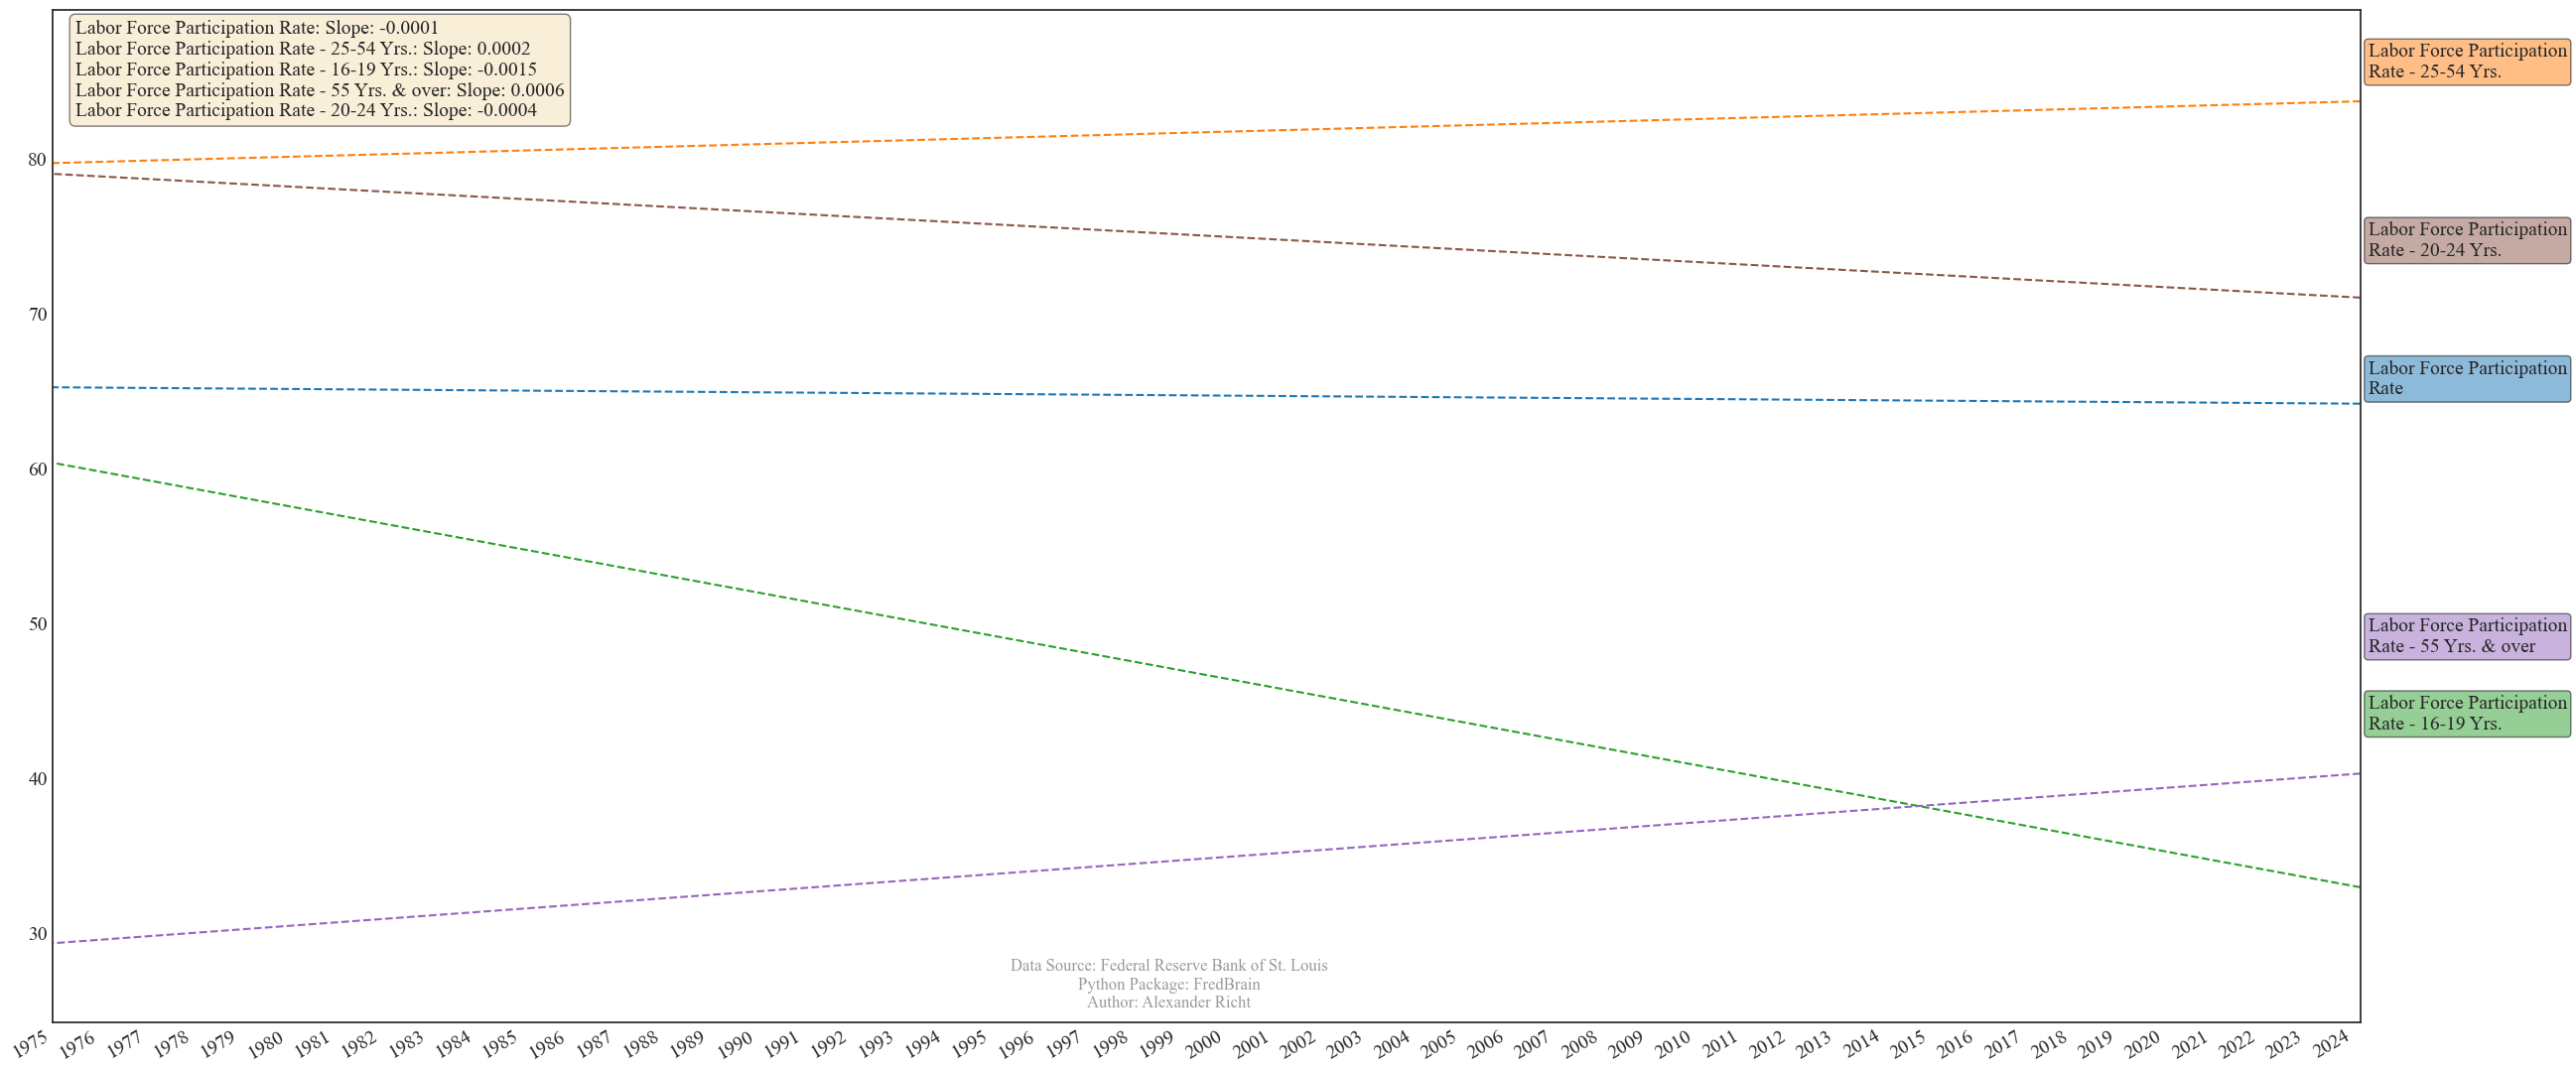

In [86]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('CIVPART', 'LNS11300060', 'LNS11300012', 'LNS11324230', 'LNS11300036')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

civpart_df = recent_df[recent_df['Series'] == 'CIVPART']
LNS11300060_df = recent_df[recent_df['Series'] == 'LNS11300060']
LNS11300012_df = recent_df[recent_df['Series'] == 'LNS11300012']
LNS11324230_df = recent_df[recent_df['Series'] == 'LNS11324230']
LNS11300036_df = recent_df[recent_df['Series'] == 'LNS11300036']

colors = {
    'CIVPART': '#1f77b4',     
    'LNS11300060': '#ff7f0e', 
    'LNS11300012': '#2ca02c', 
    'LNS11324230': '#9467bd',
    'LNS11300036': '#8c564b' 
}

for dataframe, series_name in zip([civpart_df, LNS11300060_df, LNS11300012_df, LNS11324230_df, LNS11300036_df],
                                  ['CIVPART', 'LNS11300060', 'LNS11300012', 'LNS11324230', 'LNS11300036']):
    color = colors[series_name]
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', label=f'{series_name} Unrevised')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions.\n "
    "Seasonally Adjusted: modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 5
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 5

value_range = upper_y_limit - 20
step = value_range * 0.04

for dataframe, series_name in zip(
    [civpart_df, LNS11300060_df, LNS11300012_df, LNS11324230_df, LNS11300036_df],
    ['CIVPART', 'LNS11300060', 'LNS11300012', 'LNS11324230', 'LNS11300036']
):
    color = colors[series_name]
    dataframe = dataframe.sort_values('Reporting Date')
    last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
    last_value = dataframe['Revised Value'].iloc[-1] - dataframe['Revised Value'].std() * 0.4
    text_y_position = get_text_position(used_positions, last_value, step)
    used_positions.add(text_y_position)
    series_description = dataframe['Series Description'].iloc[-1]
    wrapped_text = wrap_text(series_description, 30)
    plt.text(last_date, text_y_position, wrapped_text, fontsize=14,
             bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

legend_elements = [Line2D([0], [0], color='gray', lw=2, label='Revised Value'),
                   Line2D([0], [0], color='gray', lw=2, ls='--', label='Unrevised Value')]
first_legend = plt.legend(handles=legend_elements, loc='upper left', fontsize='large', framealpha=0.9)
plt.gca().add_artist(first_legend)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Labor Force Participation Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Labor Force Participation (%)", fontsize=18, family='Arial')

plt.savefig('Labor Force Participation Over Time.png', format='png', dpi=150, bbox_inches='tight')


fig, ax = plt.subplots(figsize=(30, 15))
def plot_trend_line(ax, dates, values, color, label):
    date_nums = mdates.date2num(dates)
    slope, intercept = np.polyfit(date_nums, values, 1)
    trend_values = date_nums * slope + intercept
    ax.plot(dates, trend_values, color=color, linestyle='--', linewidth=1.5, label=label)
    slope_text = f"Slope: {slope:.4f}" 

trend_info = {}

for dataframe, series_name in zip(
    [civpart_df, LNS11300060_df, LNS11300012_df, LNS11324230_df, LNS11300036_df],
    ['CIVPART', 'LNS11300060', 'LNS11300012', 'LNS11324230', 'LNS11300036']
):
    color = colors[series_name]
    plot_trend_line(plt.gca(), dataframe['Reporting Date'], dataframe['Revised Value'], color, series_name)
    date_nums = mdates.date2num(dataframe['Reporting Date'])
    series_description = dataframe['Series Description'].iloc[-1]
    slope, intercept = np.polyfit(date_nums, dataframe['Revised Value'], 1)
    trend_info[series_description] = (slope, intercept)

for dataframe, series_name in zip(
    [civpart_df, LNS11300060_df, LNS11300012_df, LNS11324230_df, LNS11300036_df],
    ['CIVPART', 'LNS11300060', 'LNS11300012', 'LNS11324230', 'LNS11300036']
):
    color = colors[series_name]
    dataframe = dataframe.sort_values('Reporting Date')
    last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
    last_value = dataframe['Revised Value'].iloc[-1] - dataframe['Revised Value'].std() * 0.4
    text_y_position = get_text_position(used_positions, last_value, step)
    used_positions.add(text_y_position)
    series_description = dataframe['Series Description'].iloc[-1]
    wrapped_text = wrap_text(series_description, 30)
    plt.text(last_date, text_y_position, wrapped_text, fontsize=14,
             bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))
    
trend_text = "\n".join(f"{series}: Slope: {info[0]:.4f}" for series, info in trend_info.items())

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.01, .99, trend_text, transform=plt.gca().transAxes, fontsize=14, 
               verticalalignment='top', bbox=props)
plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 5
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 5
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.savefig('Labor Force Participation Over Time Trends.png', format='png', dpi=150, bbox_inches='tight')

plt.show()

## Population Demographics and Their Impact on the Labor Market
Understanding population demographics is crucial as they offer insights into prevailing trends within the labor market. The accompanying visuals highlight notable trends in different age cohorts and the foreign-born population, revealing patterns significant to our analysis.

### Aging Workforce
As we can see below, both population demographics for the age groups of 25-54 years of age as well as the 55 years of age show an upward trending trajectory over time with quite steep slopes (occassional flatness also present). However, the slope of the 55 years of age and older population group is steeper than the slope of the 25-54 years of age group which further supports that the expanding aging workforce is contributing to a widening labor supply gap, as these demographic shifts influence fluctuations in labor force participation and unemployment rates. The apparent correlation between the increasing number of individuals not in the labor force and the rising population aged 55 and older reflects this argument and is particularly striking. The parallel slopes of these two lines suggest that as more people enter the older age demographic, a similar proportion is also exiting the labor force and increasing labor supply pressure.

### The Role of Migration in Labor Supply
Furthermore, the trend reflected within the 2nd graph plotting the population of foreign born workers suggests a growing contribution of migrant workers to the labor market, potentially mitigating the impact of an aging native workforce and support the idea that a widening labor supply gap is causing the market to look outside of the domestic market to fill neccessary roles.

### Upcoming Analysis in Chapter 2
In Chapter 2 of the analysis (as mentioned in the introduction), we will attempt to model out the correlations and the given coeffecients between these variables for additional insights on how much impact shifting age demographics may currently be having on both the unemployment rate as well as the labor force participation rate.

1975-01-01 00:00:00


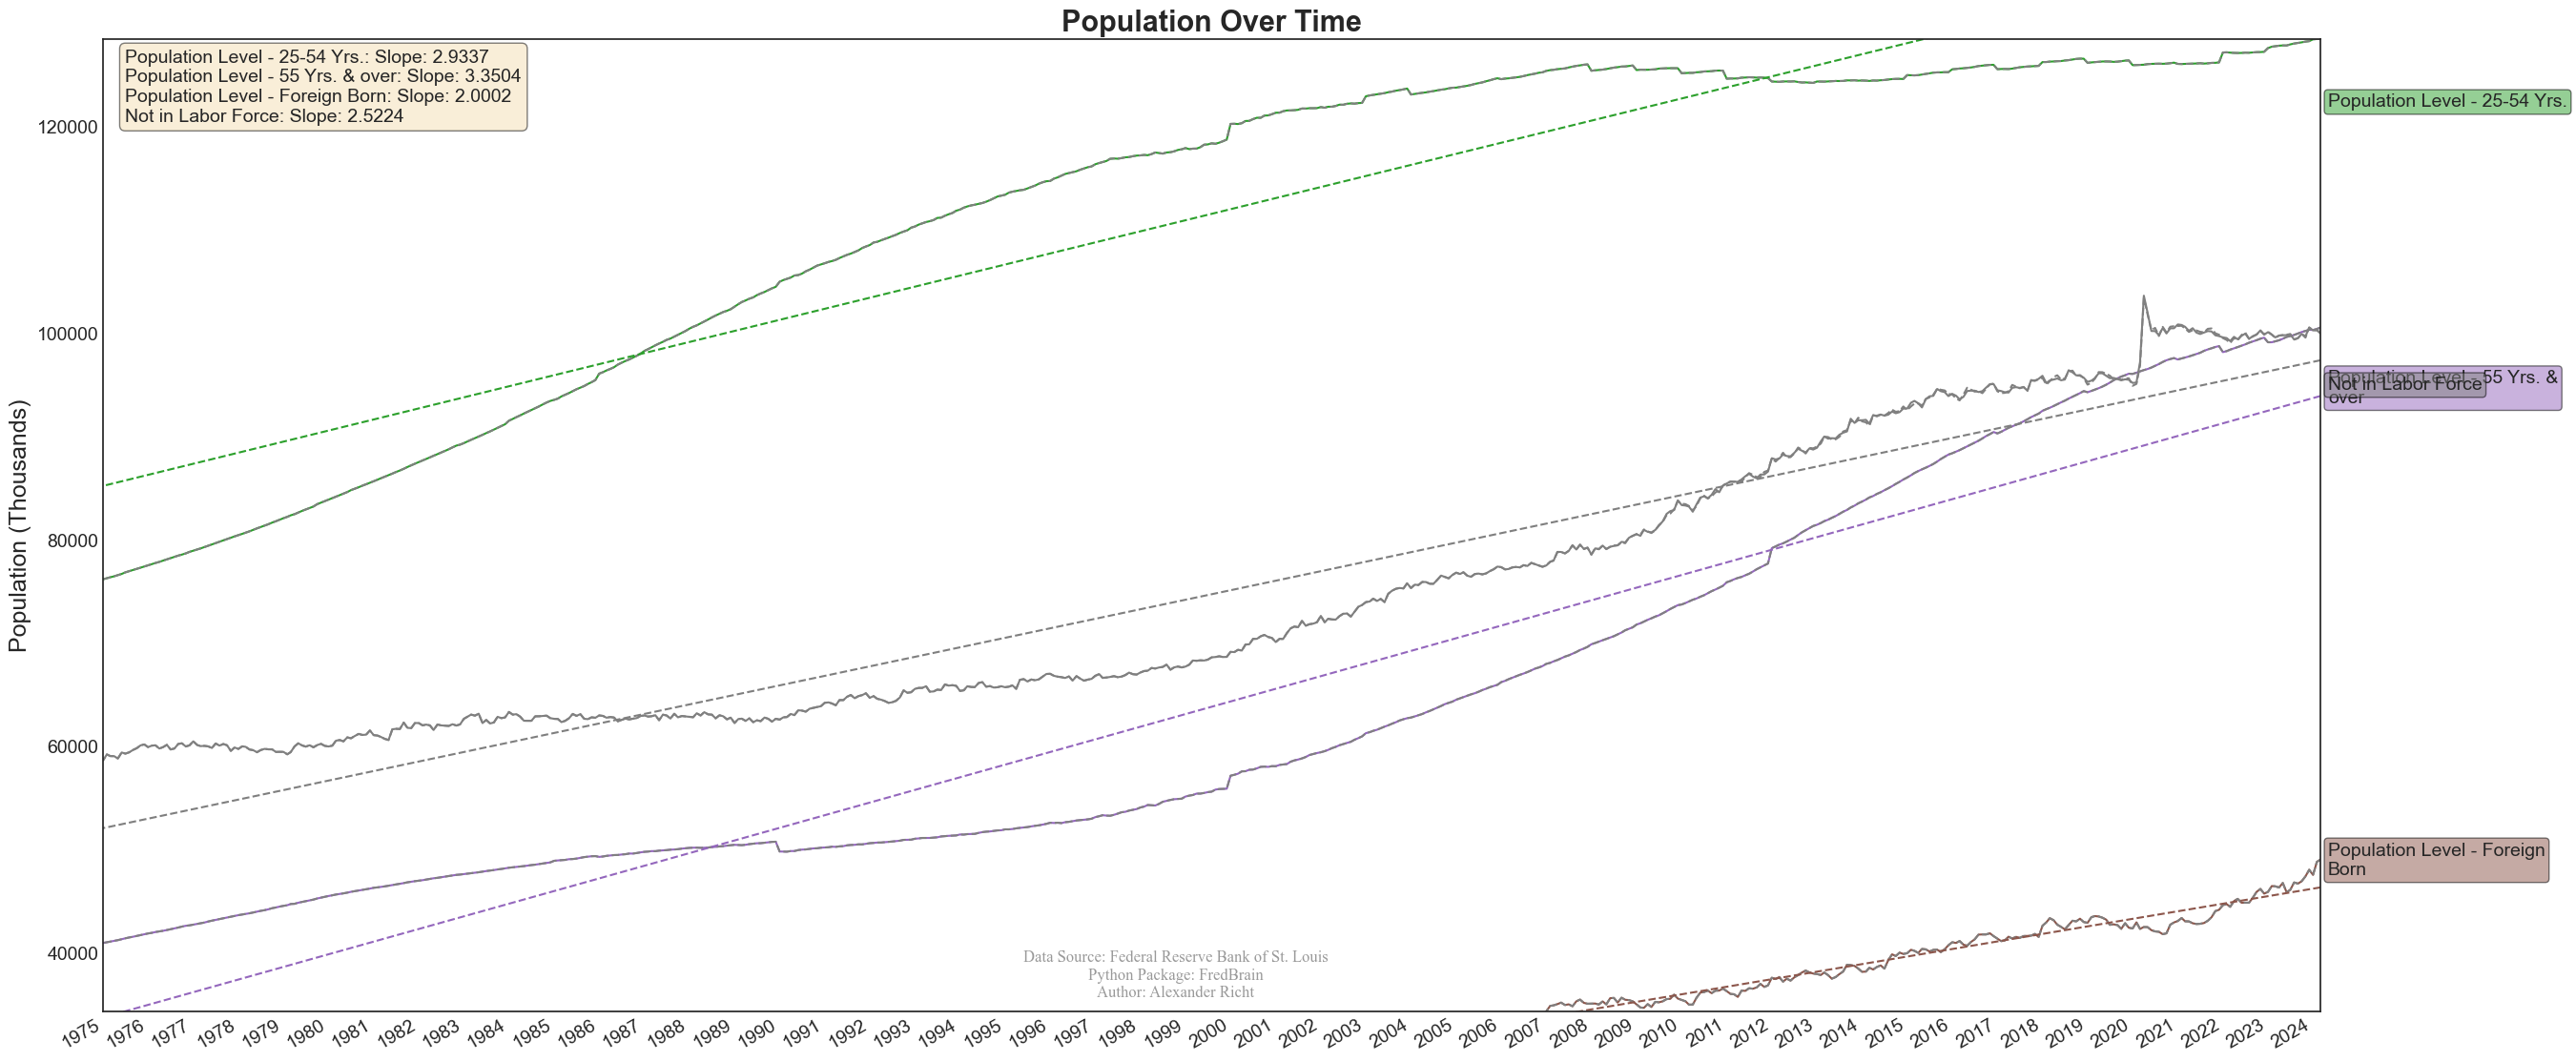

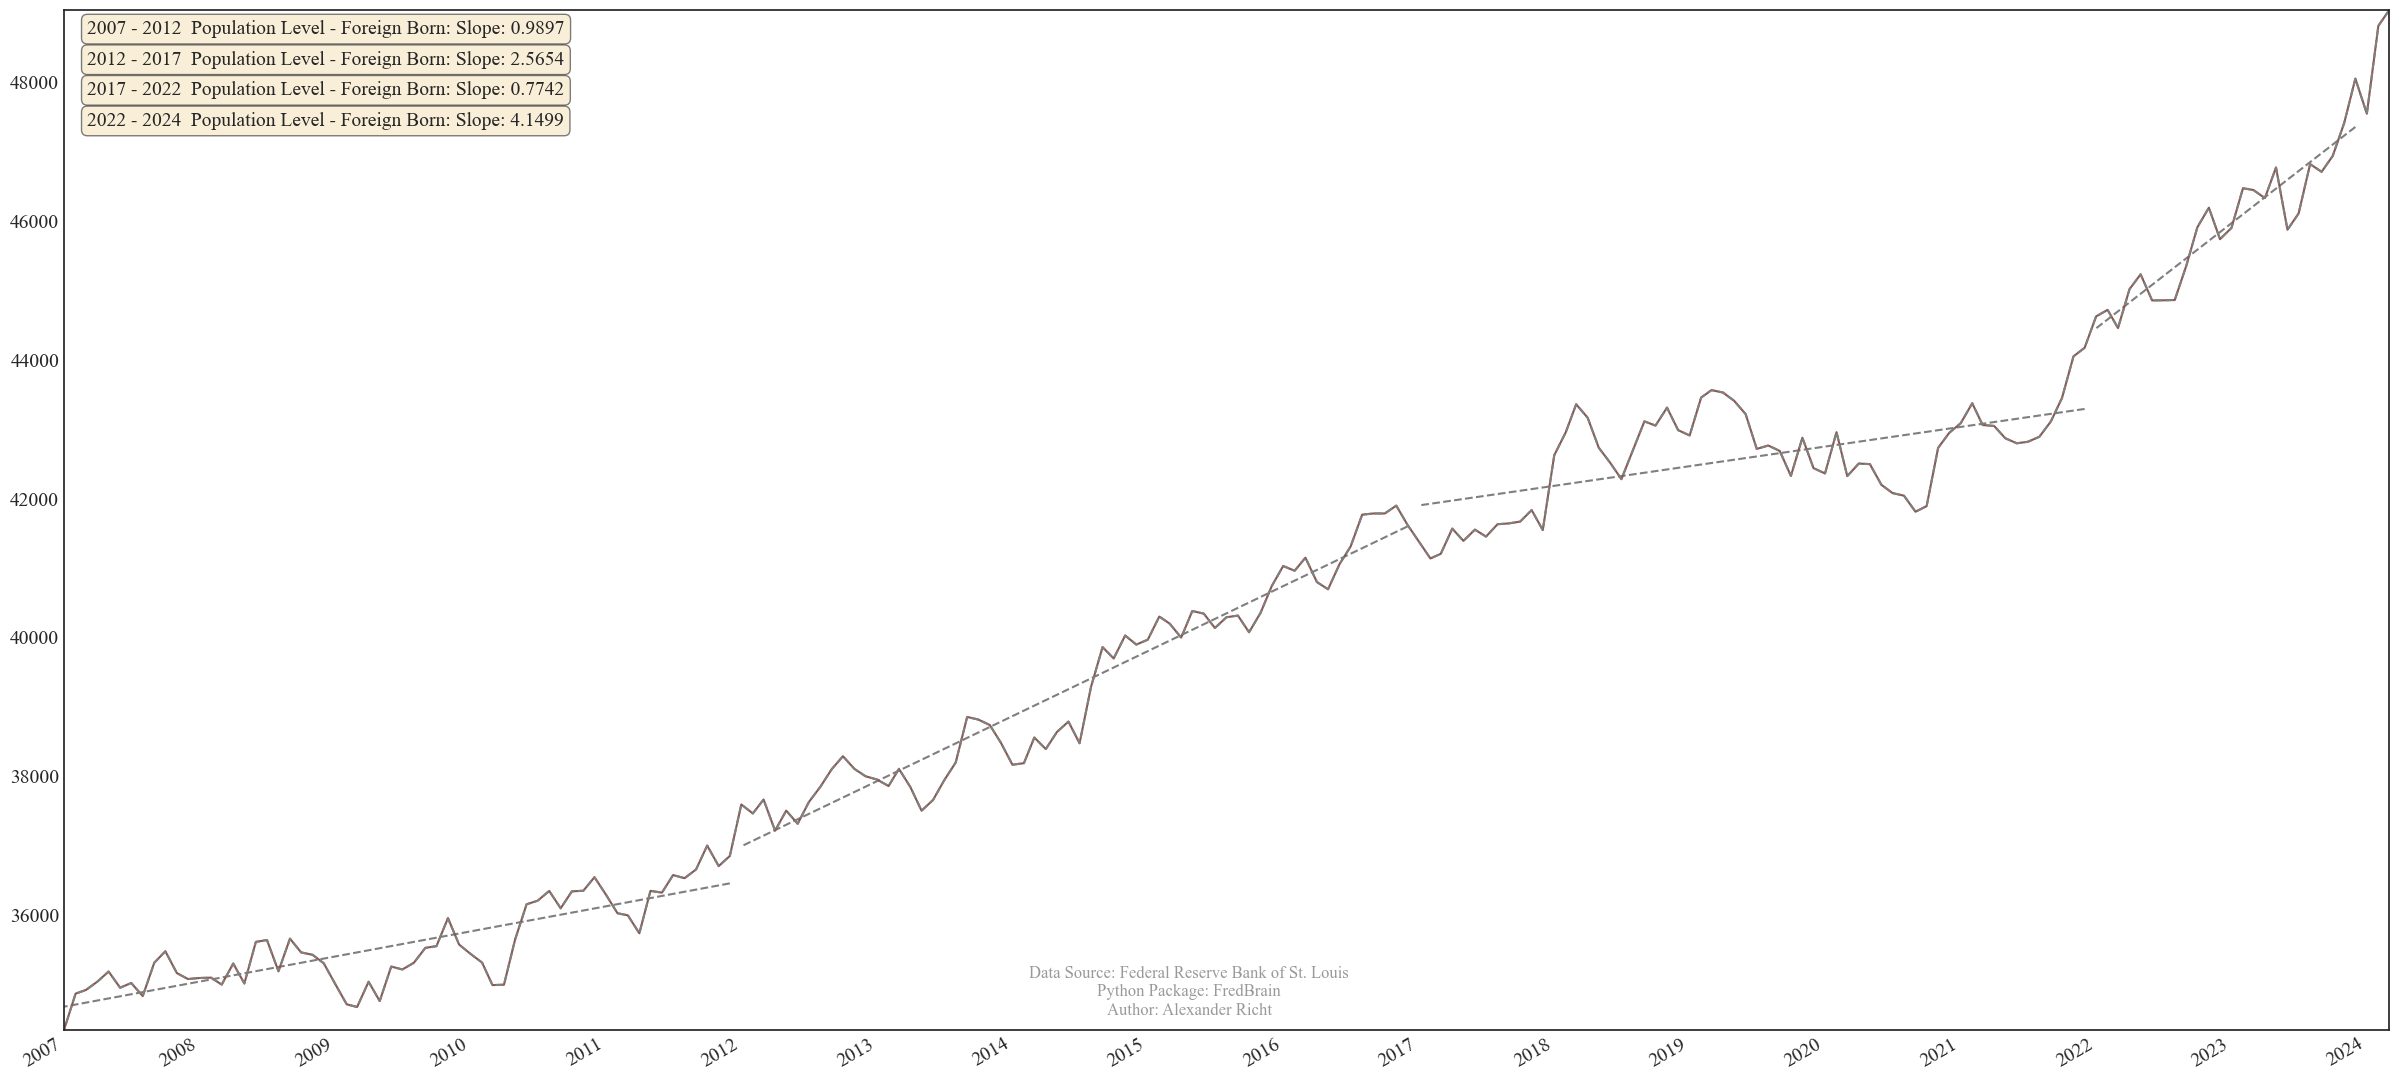

In [87]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ( 'LNU00000060', 'LNU00024230', 'LNU00073395', 'LNS15000000')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

LNU00000060_df = recent_df[recent_df['Series'] == 'LNU00000060']
LNU00024230_df = recent_df[recent_df['Series'] == 'LNU00024230']
LNU00073395_df = recent_df[recent_df['Series'] == 'LNU00073395']
LNS15000000_df = recent_df[recent_df['Series'] == 'LNS15000000']


colors = {
    'LNU00000060': '#2ca02c', 
    'LNU00024230': '#9467bd',
    'LNU00073395': '#8c564b',
    'LNS15000000': '#7f7f7f' 
}

for dataframe, series_name in zip([ LNU00000060_df, LNU00024230_df, LNU00073395_df, LNS15000000_df],
                                  ['LNU00000060', 'LNU00024230', 'LNU00073395', 'LNS15000000']):
    color = colors[series_name]
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', label=f'{series_name} Unrevised')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions.\n "
    "Seasonally Adjusted: modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

value_range = upper_y_limit - 20
step = value_range * 0.1

print(dataframe['Reporting Date'].iloc[-1])

for dataframe, series_name in zip(
    [ LNU00000060_df, LNU00024230_df, LNU00073395_df, LNS15000000_df],
    [ 'LNU00000060', 'LNU00024230', 'LNU00073395', 'LNS15000000']
):
    if not dataframe.empty:
        color = colors[series_name]
        dataframe = dataframe.sort_values('Reporting Date')
        last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
        last_value = dataframe['Revised Value'].iloc[-1] - dataframe['Revised Value'].std() * 0.4
        text_y_position = get_text_position(used_positions, last_value, step)
        used_positions.add(text_y_position)
        series_description = dataframe['Series Description'].iloc[-1]
        wrapped_text = wrap_text(series_description, 30)
        plt.text(last_date, text_y_position, wrapped_text, fontsize=14,
                 bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))
    else:
        print(f"Data for {series_name} is empty and will be skipped.")

trend_info = {}
for dataframe, series_name in zip(
    [ LNU00000060_df, LNU00024230_df, LNU00073395_df, LNS15000000_df],
    [ 'LNU00000060', 'LNU00024230', 'LNU00073395', 'LNS15000000']
):
    color = colors[series_name]
    plot_trend_line(plt.gca(), dataframe['Reporting Date'], dataframe['Revised Value'], color, series_name)
    date_nums = mdates.date2num(dataframe['Reporting Date'])
    series_description = dataframe['Series Description'].iloc[-1]
    slope, intercept = np.polyfit(date_nums, dataframe['Revised Value'], 1)
    trend_info[series_description] = (slope, intercept)

trend_text = []
trend_text = "\n".join(f"{series}: Slope: {info[0]:.4f}" for series, info in trend_info.items())
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.01, .99, trend_text, transform=plt.gca().transAxes, fontsize=14, 
               verticalalignment='top', bbox=props)

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 5
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 5

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Population Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Population (Thousands)", fontsize=18, family='Arial')


fig, ax = plt.subplots(figsize=(30, 15))
recent_df = recent_df[recent_df['Series'] == 'LNU00073395']

trend_info = {}


def plot_trend_line(ax, dates, values, color, label):
    date_nums = mdates.date2num(dates) 
    slope, intercept = np.polyfit(date_nums, values, 1) 
    trendline = np.polyval([slope, intercept], date_nums)
    ax.plot(dates, trendline, color=color, linestyle='--', label=label)


start_year = recent_df['Reporting Date'].min().year
end_year = recent_df['Reporting Date'].max().year

current_y_pos = 0.99
text_gap = 0.03 

for period_start in range(start_year, end_year, 5):
    period_end = period_start + 5
    if period_end >= 2024:
        period_end = 2024
    else:
        period_end
    range_period = f"{period_start} - {period_end}"
    mask = (recent_df['Reporting Date'].dt.year >= period_start) & (recent_df['Reporting Date'].dt.year < period_end)
    period_df = recent_df.loc[mask]
    date_nums = mdates.date2num(period_df['Reporting Date'])
    if not period_df.empty:
        plot_trend_line(ax, period_df['Reporting Date'], period_df['Revised Value'], color, f'Trend {period_start}-{period_end - 1}')
        slope, intercept = np.polyfit(date_nums, period_df['Revised Value'], 1)
        series_description = period_df['Series Description'].iloc[-1]
        trend_info = {series_description: (slope, intercept)}
        trend_text = "\n".join(f"{range_period}  {series}: Slope: {info[0]:.4f}" for series, info in trend_info.items())
        plt.gca().text(0.01, current_y_pos, trend_text, transform=plt.gca().transAxes, fontsize=14, 
                       verticalalignment='top', bbox=props)
        current_y_pos -= text_gap
    else:
        print(f"No data for the period {period_start}-{period_end - 1}")

for dataframe, series_name in zip(    [ LNU00073395_df],
    [ 'LNU00073395']):
    color = colors[series_name]
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', label=f'{series_name} Unrevised')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 5
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 5
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.savefig('Population Over Time.png', format='png', dpi=150)

plt.show()

## The Great Battle of Filling Jobs
The 'Great Battle of Filling Jobs' underscores a critical inflection point for the economy, where the labor resources needed to meet business needs is being fundamentally challenged. As we move further from the initial shocks of the pandemic, it's evident that the job market is undergoing a transformation, reflecting deeper trends than the immediate effects of economic reopening.

The graph illustrates a steady rise in job vacancies over time reaching sustained unprecidentent levels, with a slope that suggests a persistent and growing gap between available positions and the workforce ready to fill them. This gap points to systemic changes in the employment landscape, influenced by an aging population and evolving workforce behavior.

2000-12-01 00:00:00


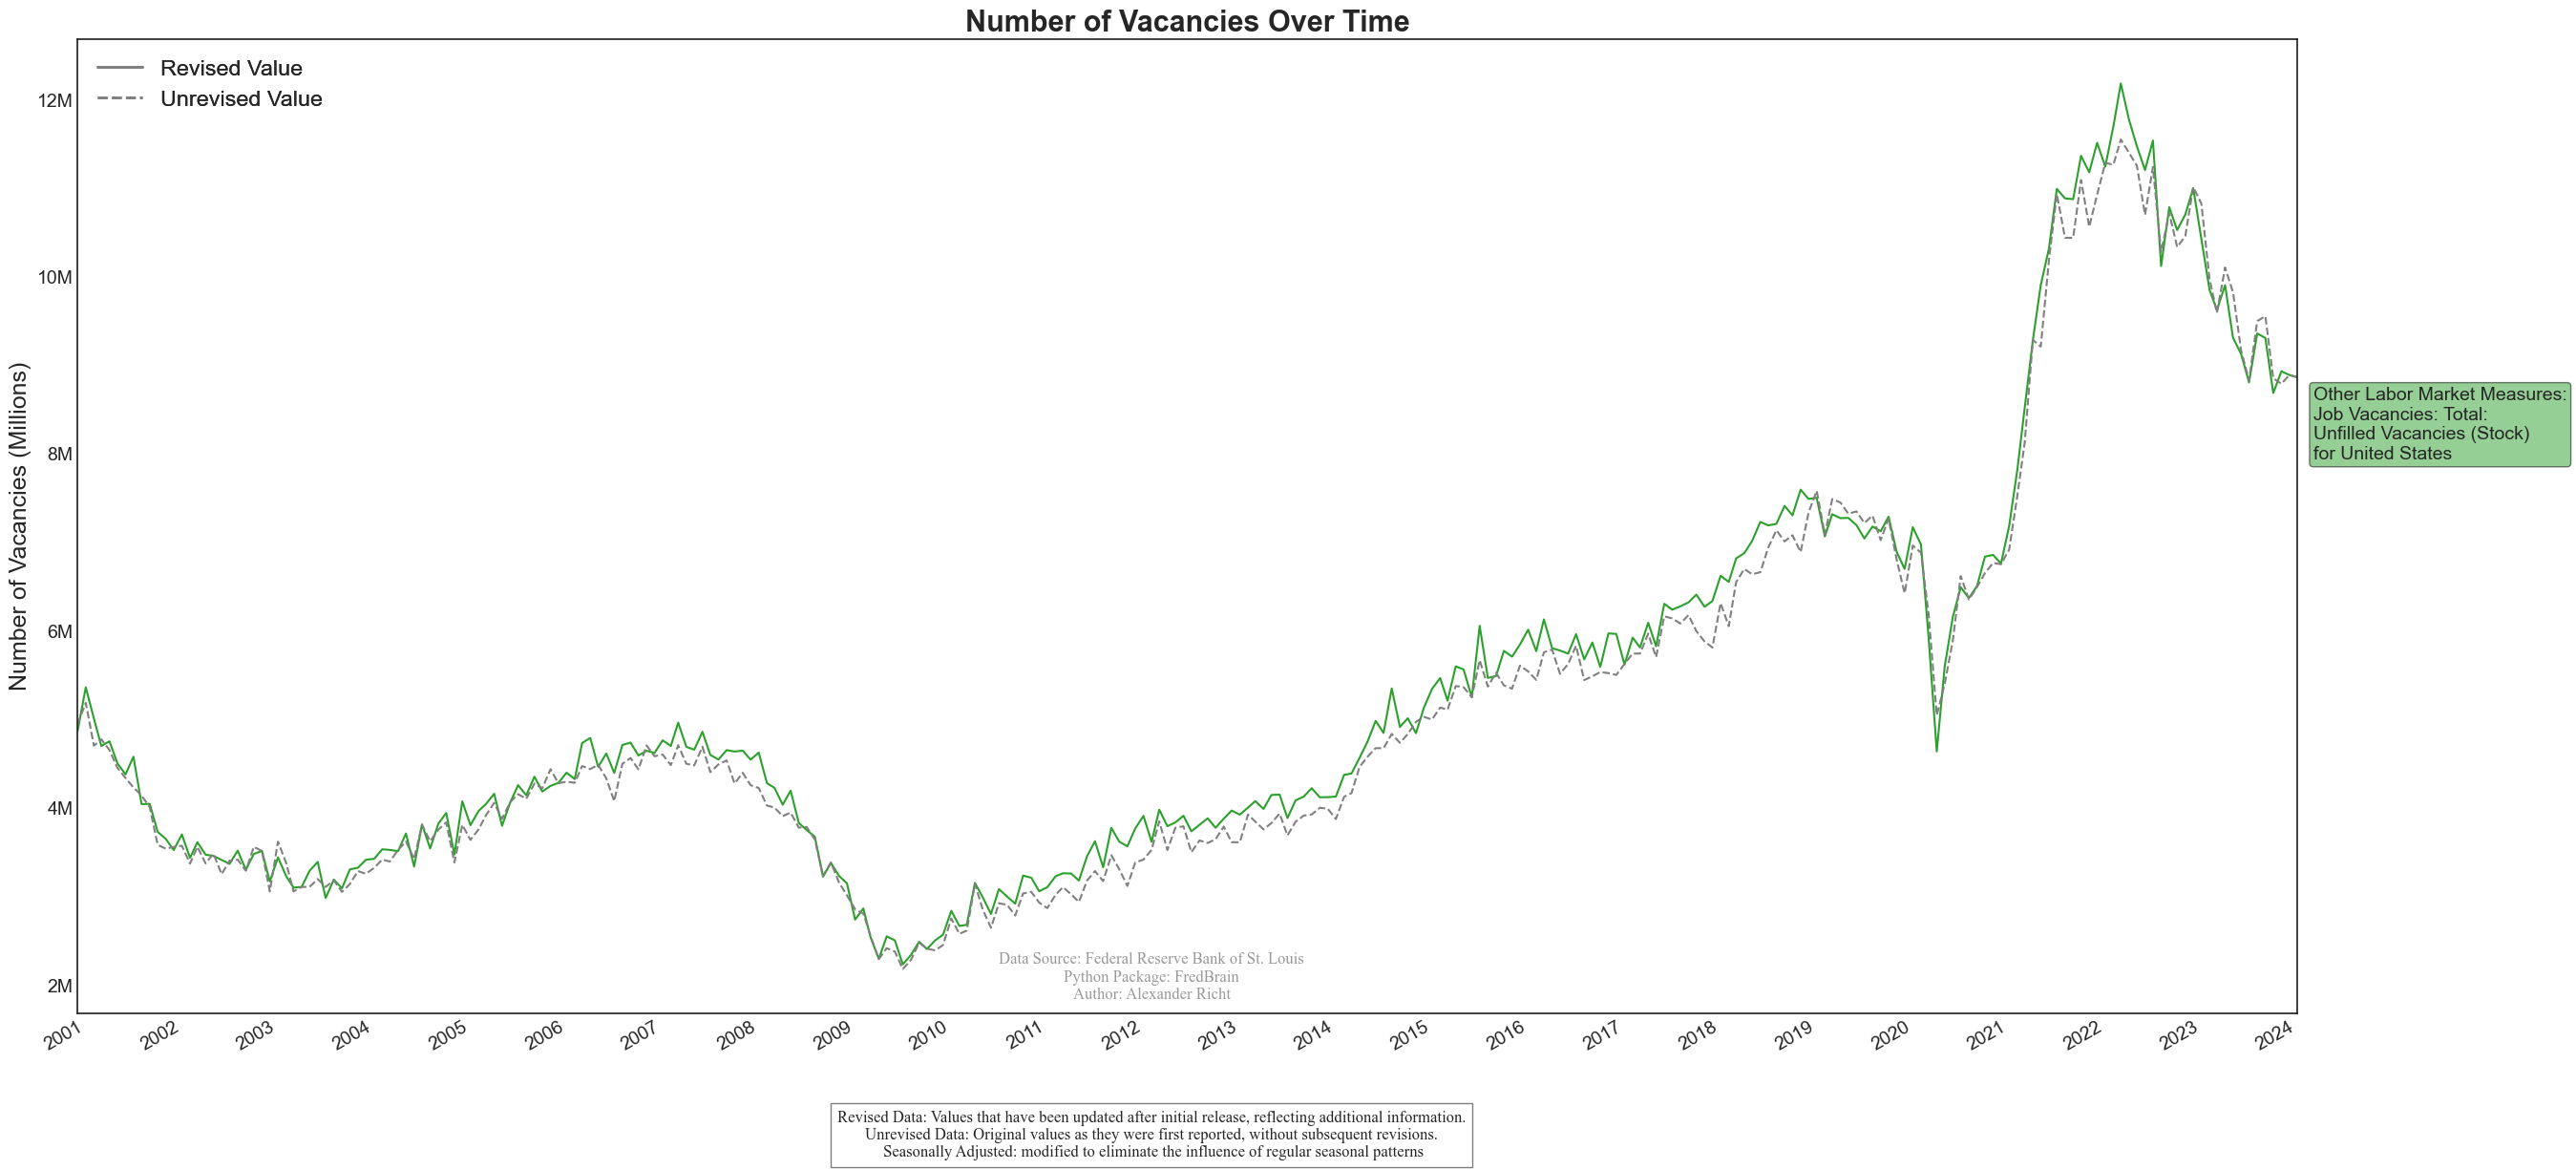

In [88]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('LMJVTTUVUSM647S')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 50
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

LMJVTTUVUSM647S_df = recent_df[recent_df['Series'] == 'LMJVTTUVUSM647S']

colors = {
    'LMJVTTUVUSM647S': '#2ca02c'
}

for dataframe, series_name in zip([LMJVTTUVUSM647S_df],
                                  ['LMJVTTUVUSM647S']):
    color = colors[series_name]
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', label=f'{series_name} Unrevised')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions.\n "
    "Seasonally Adjusted: modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def thousands_formatter(x, pos):
    return f'{int(x/1000000)}M'

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

value_range = upper_y_limit - 20
step = value_range * 0.1

print(dataframe['Reporting Date'].iloc[-1])

for dataframe, series_name in zip([LMJVTTUVUSM647S_df],
                                  ['LMJVTTUVUSM647S']
):
    if not dataframe.empty:
        color = colors[series_name]
        dataframe = dataframe.sort_values('Reporting Date')
        last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
        last_value = dataframe['Revised Value'].iloc[-1] - dataframe['Revised Value'].std() * 0.4
        text_y_position = get_text_position(used_positions, last_value, step)
        used_positions.add(text_y_position)
        series_description = dataframe['Series Description'].iloc[-1]
        wrapped_text = wrap_text(series_description, 30)
        plt.text(last_date, text_y_position, wrapped_text, fontsize=14,
                 bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))
    else:
        print(f"Data for {series_name} is empty and will be skipped.")


legend_elements = [Line2D([0], [0], color='gray', lw=2, label='Revised Value'),
                   Line2D([0], [0], color='gray', lw=2, ls='--', label='Unrevised Value')]
first_legend = plt.legend(handles=legend_elements, loc='upper left', fontsize='large', framealpha=0.9)
plt.gca().add_artist(first_legend)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Number of Vacancies Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Number of Vacancies (Millions)", fontsize=18, family='Arial')

plt.savefig('Job Vacancies.png', format='png', dpi=150)

plt.show()

## Working Hard or Hardly Working?

Despite labor market supply pressure, the existing labor force is not working longer hours in response. Instead, if we take the figures at face value and that the given data collected is of high quality, the overall number of weekly hours worked has been rather stable over the last 20 years.

2006-03-01 00:00:00


Text(0, 0.5, 'Average Weekly Hours')

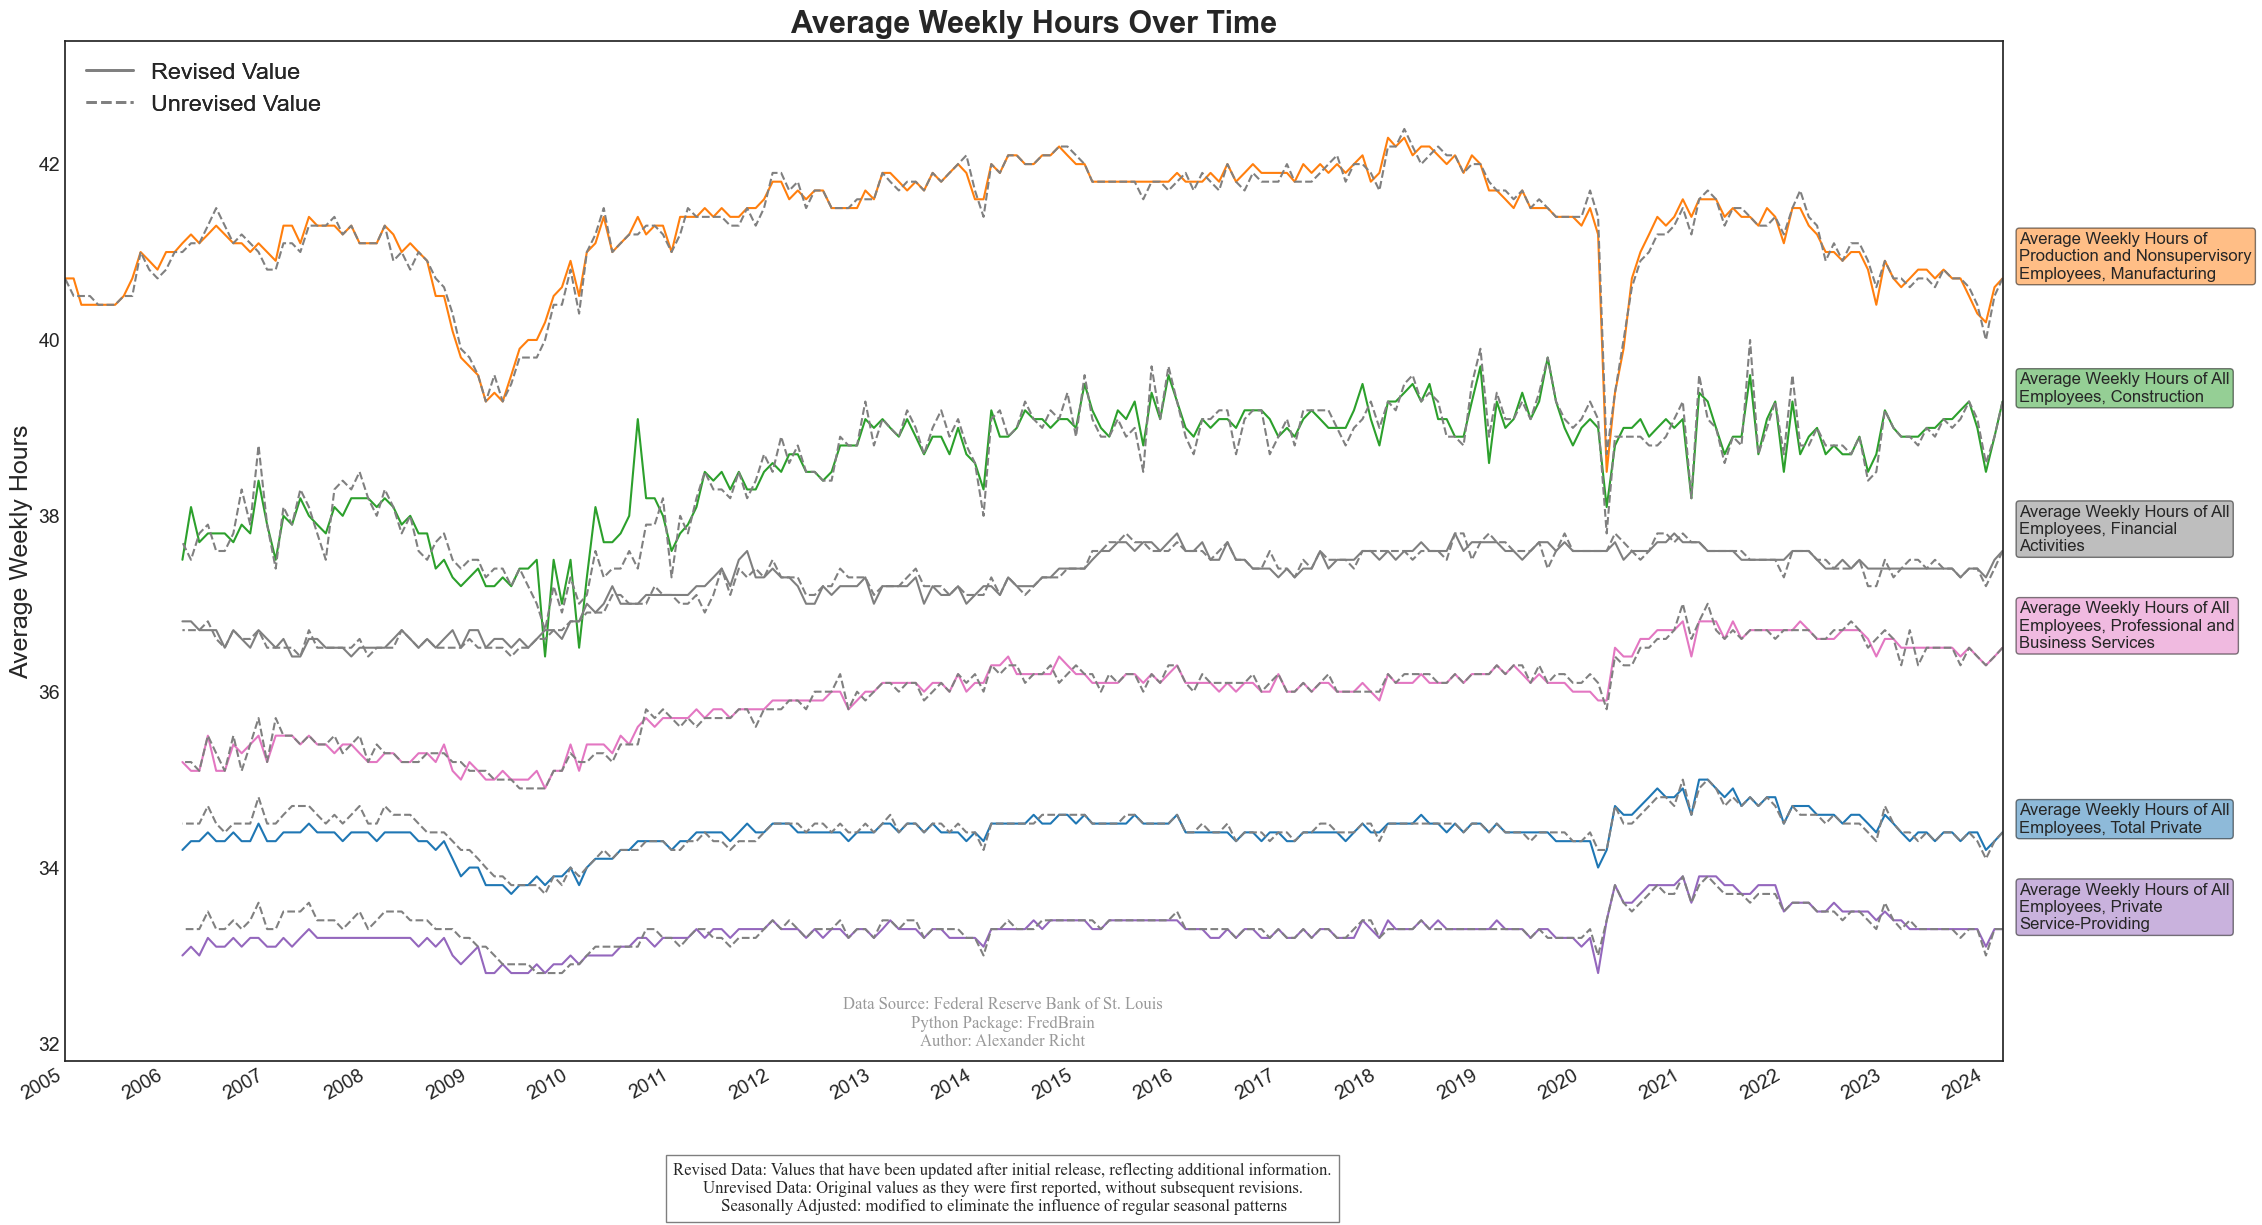

In [92]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ( 'AWHAETP', 'AWHMAN', 'AWHAECON', 'AWHAEPSP', 'AWHAEINFO', 'AWHAEPBS', 'AWHAEFA', 'AWHAEDG')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(25, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 20
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

AWHAETP_df = recent_df[recent_df['Series'] == 'AWHAETP']
AWHMAN_df = recent_df[recent_df['Series'] == 'AWHMAN']
AWHAECON_df = recent_df[recent_df['Series'] == 'AWHAECON']
AWHAEPSP_df = recent_df[recent_df['Series'] == 'AWHAEPSP']
AWHAEINFO_df = recent_df[recent_df['Series'] == 'AWHAEINFO']
AWHAEPBS_df = recent_df[recent_df['Series'] == 'AWHAEPBS']
AWHAEFA_df = recent_df[recent_df['Series'] == 'AWHAEFA']
AWHAEDG_df = recent_df[recent_df['Series'] == 'AWHAEDG']

colors = {
    'AWHAETP': '#1f77b4',    
    'AWHMAN': '#ff7f0e',  
    'AWHAECON': '#2ca02c',  
    'AWHAEPSP': '#9467bd', 
    'AWHAEINFO': '#8c564b', 
    'AWHAEPBS': '#e377c2', 
    'AWHAEFA': '#7f7f7f', 
    'AWHAEDG': '#bcbd22',  
}

for dataframe, series_name in zip([ AWHAETP_df, AWHMAN_df, AWHAECON_df, AWHAEPSP_df, AWHAEPBS_df, AWHAEFA_df ],
                                  ['AWHAETP', 'AWHMAN', 'AWHAECON', 'AWHAEPSP', 'AWHAEPBS', 'AWHAEFA']):
    color = colors[series_name]
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', label=f'{series_name} Unrevised')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions.\n "
    "Seasonally Adjusted: modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

value_range = upper_y_limit - 20
step = value_range * 0.04

print(dataframe['Reporting Date'].iloc[-1])

for dataframe, series_name in zip(
            [ AWHAETP_df, AWHMAN_df, AWHAECON_df, AWHAEPSP_df, AWHAEPBS_df, AWHAEFA_df ],
                                  ['AWHAETP', 'AWHMAN', 'AWHAECON', 'AWHAEPSP', 'AWHAEPBS', 'AWHAEFA', 'AWHAEDG']
):
    if not dataframe.empty:
        color = colors[series_name]
        dataframe = dataframe.sort_values('Reporting Date')
        last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
        last_value = dataframe['Revised Value'].iloc[-1]
        text_y_position = get_text_position(used_positions, last_value, step)
        used_positions.add(text_y_position)
        series_description = dataframe['Series Description'].iloc[-1]
        wrapped_text = wrap_text(series_description, 30)
        plt.text(last_date, text_y_position, wrapped_text, fontsize=12,
                 bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))
    else:
        print(f"Data for {series_name} is empty and will be skipped.")

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 1
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 1

legend_elements = [Line2D([0], [0], color='gray', lw=2, label='Revised Value'),
                   Line2D([0], [0], color='gray', lw=2, ls='--', label='Unrevised Value')]
first_legend = plt.legend(handles=legend_elements, loc='upper left', fontsize='large', framealpha=0.9)
plt.gca().add_artist(first_legend)

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Average Weekly Hours Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Average Weekly Hours", fontsize=18, family='Arial')

2005-01-01 00:00:00


Text(0, 0.5, 'Disposable Income')

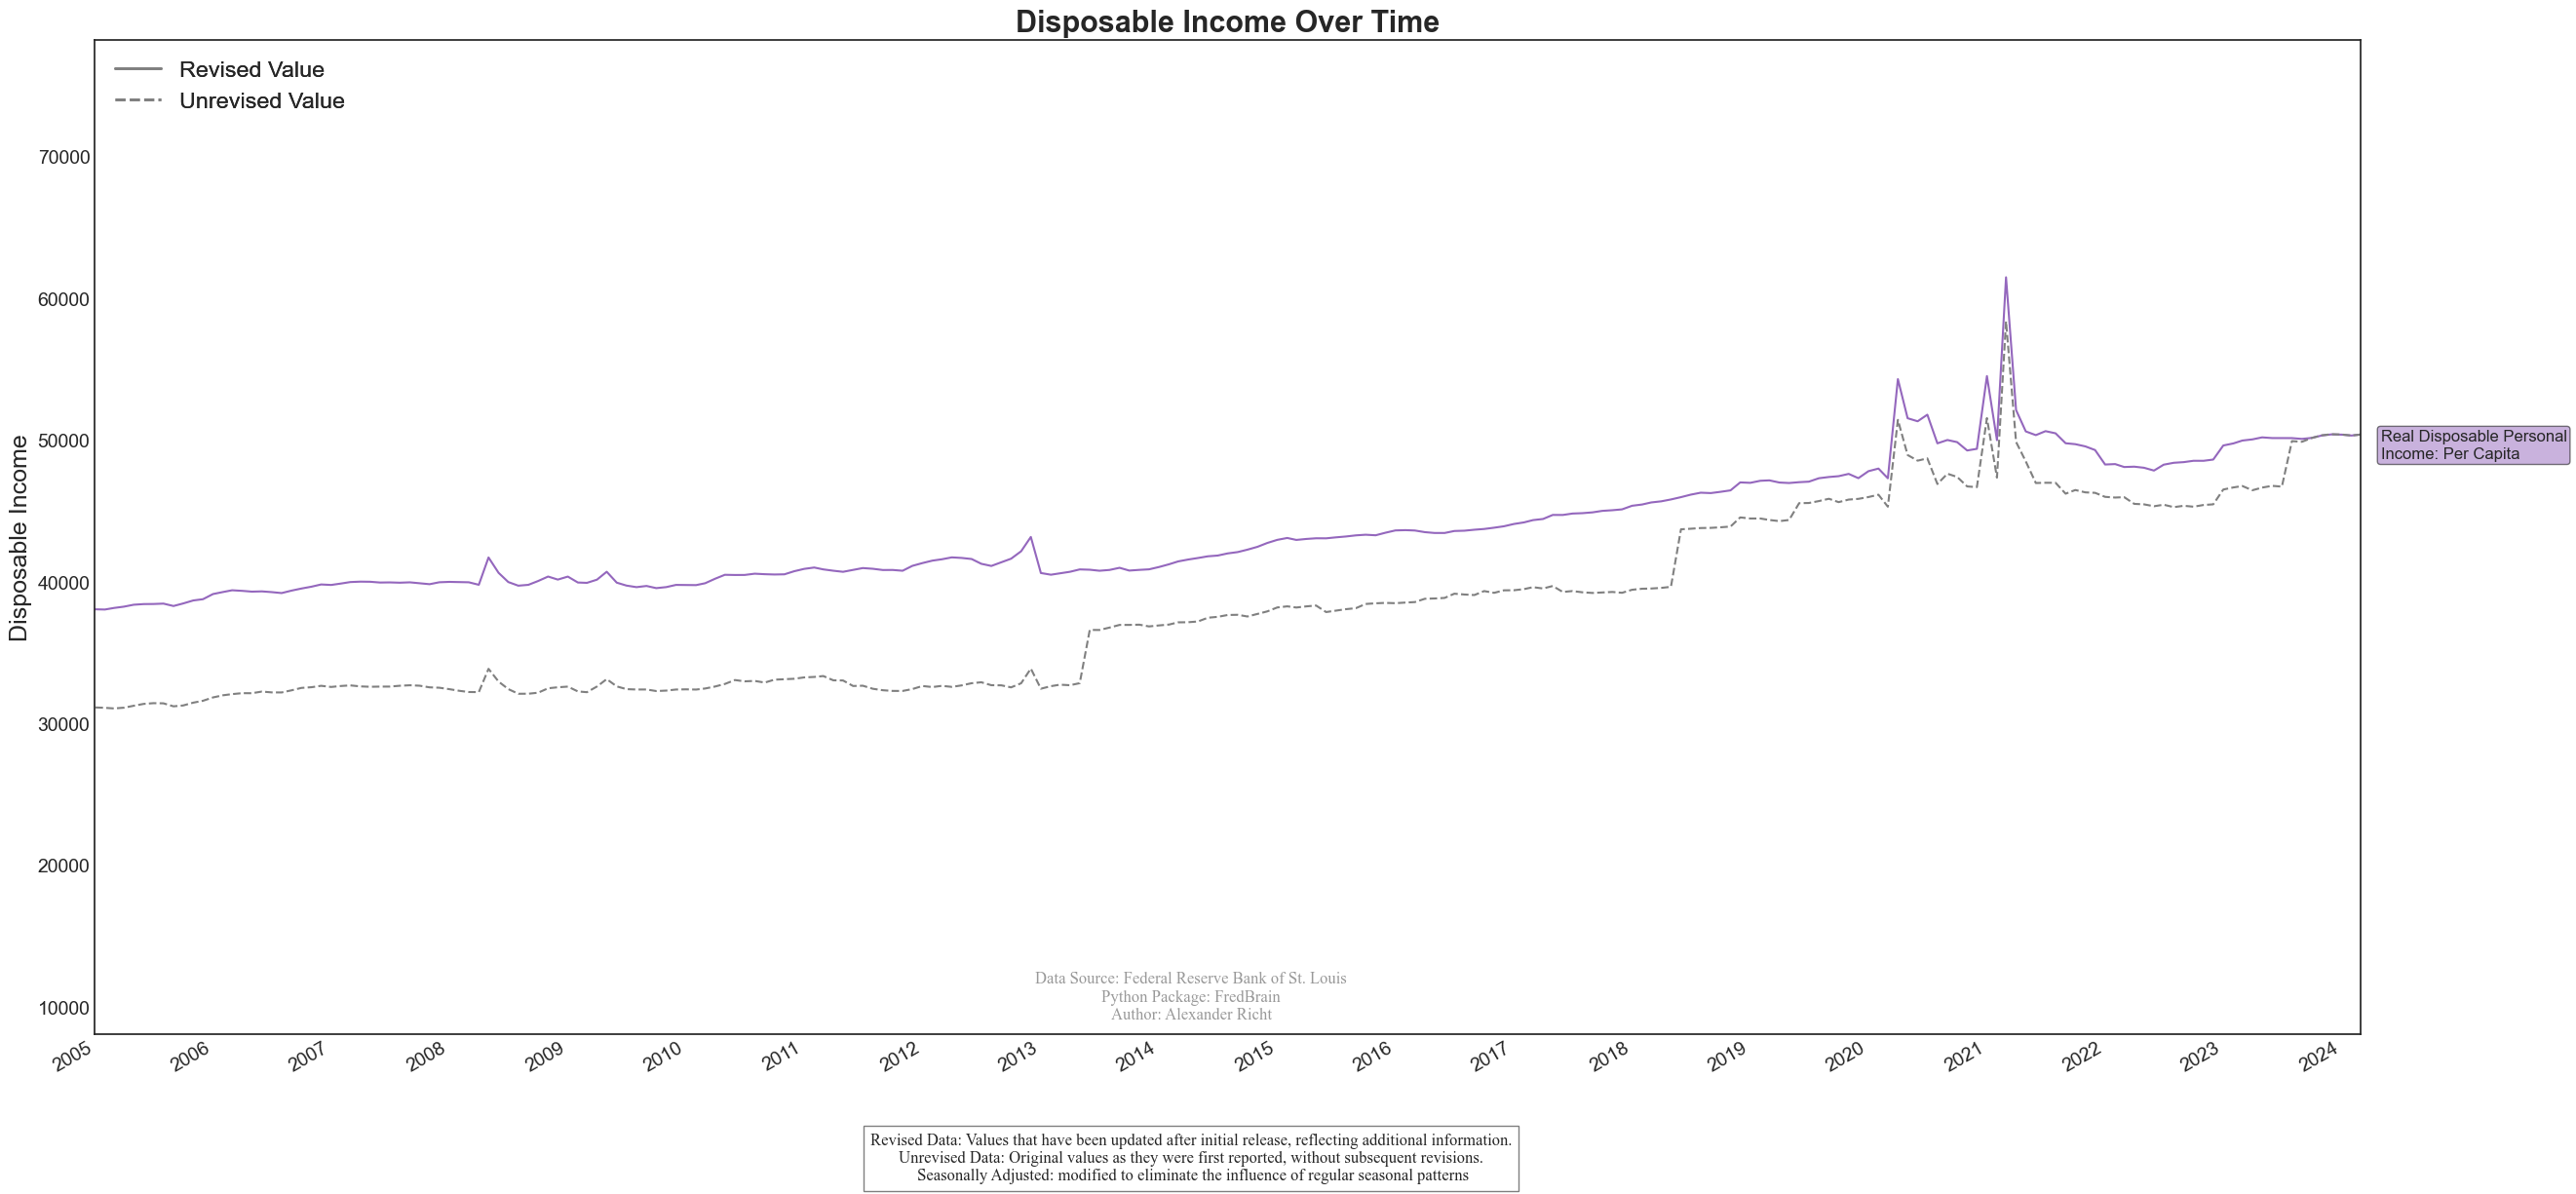

In [90]:
Data_Query = f"SELECT * FROM research.`Indicators_Revised&Unrevised` Where Series in ('MEHOINUSA672N', 'MEPAINUSA672N', 'DSPIC96', 'A229RX0')"
cursor.execute(Data_Query)
Indicator_Data = cursor.fetchall()
Indicator_Dataframe = pd.DataFrame(Indicator_Data, columns=['sql_upload_datetime', 'Reporting Date', 'Unrevised Value', 'Revised Value', 'Series', 'Series Description', 'Series Frequency', 'Series Unit', 'Series Popularity', 'Series Adjustment Type', 'Series Long Description', 'Website URL', 'Unique Key'])
Indicator_Dataframe = Indicator_Dataframe.sort_values(by='Reporting Date', ascending=False)

plt.figure(figsize=(30, 15))

starting_year = Indicator_Dataframe['Reporting Date'].max().year - 20
mask = Indicator_Dataframe['Reporting Date'].dt.year > starting_year
recent_df = Indicator_Dataframe.loc[mask].copy()

plt.style.use(['seaborn-v0_8-white'])

MEHOINUSA672N_df = recent_df[recent_df['Series'] == 'MEHOINUSA672N']
MEPAINUSA672N_df = recent_df[recent_df['Series'] == 'MEPAINUSA672N']
DSPIC96_df = recent_df[recent_df['Series'] == 'DSPIC96']
A229RX0_df = recent_df[recent_df['Series'] == 'A229RX0']


colors = {
    'MEHOINUSA672N': '#1f77b4',
    'MEPAINUSA672N': '#ff7f0e',  
    'DSPIC96': '#2ca02c',  
    'A229RX0': '#9467bd', 
    'AWHAEINFO': '#8c564b', 
    'AWHAEPBS': '#e377c2', 
    'AWHAEFA': '#7f7f7f', 
    'AWHAEDG': '#bcbd22',  
}

for dataframe, series_name in zip([ A229RX0_df ],
                                  [ 'A229RX0']):
    color = colors[series_name]
    plt.plot(dataframe['Reporting Date'], dataframe['Revised Value'], color=color, linewidth=1.5, label=f'{series_name} Revised')
    plt.plot(dataframe['Reporting Date'], dataframe['Unrevised Value'], color='gray', linewidth=1.5, linestyle='--', label=f'{series_name} Unrevised')

description = (
    "Revised Data: Values that have been updated after initial release, "
    "reflecting additional information.\n"
    "Unrevised Data: Original values as they were first reported, "
    "without subsequent revisions.\n "
    "Seasonally Adjusted: modified to eliminate the influence of regular seasonal patterns"
)
copyright_notice = (
    "Data Source: Federal Reserve Bank of St. Louis\n"
    "Python Package: FredBrain\n"
    "Author: Alexander Richt"
)

def wrap_text(text, char_limit):
    words = text.split()
    wrapped_text = ""
    line = ""
    for word in words:
        if len(line) + len(word) + 1 <= char_limit:
            line += word + " "
        else:
            wrapped_text += line.strip() + "\n"
            line = word + " "
    wrapped_text += line.strip()
    return wrapped_text


def get_text_position(used_positions, current_value, step):
    position = current_value
    while any(abs(pos - position) < step for pos in used_positions):
        position += step
    return position

used_positions = set() 

value_range = upper_y_limit - 20
step = value_range * 0.04

print(dataframe['Reporting Date'].iloc[-1])

for dataframe, series_name in zip(
       [  A229RX0_df ],
                                  ['A229RX0']
):
    if not dataframe.empty:
        color = colors[series_name]
        dataframe = dataframe.sort_values('Reporting Date')
        last_date = dataframe['Reporting Date'].iloc[-1] + pd.DateOffset(months=2)
        last_value = dataframe['Revised Value'].iloc[-1] - dataframe['Revised Value'].std() * 0.4
        text_y_position = get_text_position(used_positions, last_value, step)
        used_positions.add(text_y_position)
        series_description = dataframe['Series Description'].iloc[-1]
        wrapped_text = wrap_text(series_description, 30)
        plt.text(last_date, text_y_position, wrapped_text, fontsize=12,
                 bbox=dict(facecolor=color, alpha=0.5, boxstyle='round,pad=0.2'))
    else:
        print(f"Data for {series_name} is empty and will be skipped.")

plt.xlim(left=recent_df['Reporting Date'].min(), right=recent_df['Reporting Date'].max())
upper_y_limit = recent_df[['Revised Value', 'Unrevised Value']].max().max() + 1
bottom_y_limit = recent_df[['Revised Value', 'Unrevised Value']].min().min() - 1

legend_elements = [Line2D([0], [0], color='gray', lw=2, label='Revised Value'),
                   Line2D([0], [0], color='gray', lw=2, ls='--', label='Unrevised Value')]
first_legend = plt.legend(handles=legend_elements, loc='upper left', fontsize='large', framealpha=0.9)
plt.gca().add_artist(first_legend)

plt.ylim(bottom=bottom_y_limit, top=upper_y_limit)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.figtext(0.5, 0.1, description, ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.text(0.5, 0.225, copyright_notice, fontsize=12, color='gray', ha='center', va='center',
         alpha=0.8, transform=plt.gcf().transFigure, zorder=0)

plt.title("Disposable Income Over Time", fontsize=22, fontweight='bold', family='Arial')
plt.ylabel("Disposable Income", fontsize=18, family='Arial')